# Exploration der Word2vec Embeddings 30

- balanciertes Korpus
- ohne Bigramme
- vector_size: 300
- window: 10
- seed: 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statistics 

from collections import Counter
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import spatial
from sklearn.manifold import TSNE
from tabulate import tabulate

In [3]:
# trainierte Modelle laden

w2v1 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v1.model'))
w2v2 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v2.model'))
w2v3 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v3.model'))
w2v4 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v4.model'))
w2v5 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v5.model'))
w2v6 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v6.model'))
w2v7 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v7.model'))
w2v8 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v8.model'))
w2v9 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v9.model'))
w2v10 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v10.model'))
w2v11 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v11.model'))
w2v12 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v12.model'))
w2v13 = Word2Vec.load(os.path.join('../trained_models/Word2Vec30', '30w2v13.model'))

In [4]:
periods = ['1700-1750', '1751-1800', '1801-1825', '1826-1850', '1851-1875', '1876-1900', '1901-1925', 
          '1926-1950', '1951-1975', '1976-2000', '2001-2010', '2011-2016', '2017-2021']

In [5]:
models = [w2v1, w2v2, w2v3, w2v4, w2v5, w2v6, w2v7, w2v8, w2v9, w2v10, w2v11, w2v12, w2v13] 

In [6]:
# Hilfsfunktion zum Vergleich der most similar words eines Lemmas in den Zeitabschnitten

def compare_words(periods, models, word):
    msw = {}
    for p, m in zip(periods, models):
        if word in m.wv:
            msw.update({p : m.wv.most_similar(positive=[word], topn=10)})
        elif word not in m.wv:
            msw.update({p : 'not in vocab'})
    table = pd.DataFrame.from_dict(msw)
    return table

In [7]:
# Hilfsfunktion zum Vergleich der Cosinus-Ähnlichkeit in den Zeitabschnitten

def compare_cos(periods, models, word1, word2):
    cosines = {}
    for p, m in zip(periods, models):
        if word1 in m.wv:
            vector1 = m.wv[word1]  
            vector2 = m.wv[word2]  
            cos = 1 - spatial.distance.cosine(vector1, vector2) 
            cosines.update({p : cos})
    return cosines

## Kontrollgruppe

### Kontrollgruppe - molto

In [8]:
domani0 = compare_cos(periods, models, 'domani', 'molto')
finora0 = compare_cos(periods, models, 'finora', 'molto')
ieri0 = compare_cos(periods, models, 'ieri', 'molto')
oggi0 = compare_cos(periods, models, 'oggi', 'molto')
presto0 = compare_cos(periods, models, 'presto', 'molto')
sempre0 = compare_cos(periods, models, 'sempre', 'molto')
spesso0 = compare_cos(periods, models, 'spesso', 'molto')

In [20]:
oggi0

{'1700-1750': 0.2271023839712143,
 '1751-1800': 0.305278480052948,
 '1801-1825': 0.27351996302604675,
 '1826-1850': 0.16269657015800476,
 '1851-1875': 0.2655778229236603,
 '1876-1900': 0.3085609972476959,
 '1901-1925': 0.24186551570892334,
 '1926-1950': 0.2357746660709381,
 '1951-1975': 0.30963897705078125,
 '1976-2000': 0.3975677192211151,
 '2001-2010': 0.35081058740615845,
 '2011-2016': 0.3366939425468445,
 '2017-2021': 0.3775441348552704}

In [10]:
molto_df = pd.DataFrame([domani0, finora0, ieri0, oggi0, presto0, sempre0, spesso0])

# Durchschnitt pro Zeitraum
molto_mean = dict(molto_df.mean())

# min pro Zeitraum
molto_min = dict(molto_df.min())
molto_min_list = [float(x) for x in list(molto_min.values())]

#max pro Zeitraum 
molto_max = dict(molto_df.max())
molto_max_list = [float(x) for x in list(molto_max.values())]

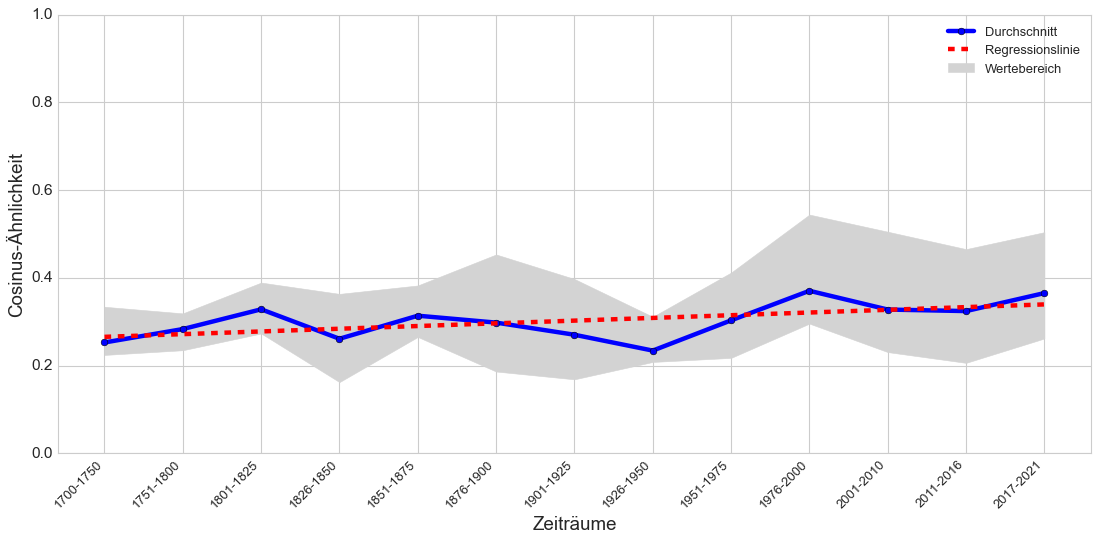

In [15]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(molto_mean)))
plt.xticks(ticks=x_indexes, labels=molto_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, molto_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, molto_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, molto_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, molto_max_list, molto_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Kontrollgruppe - Quelldomäne

In [21]:
# domani 

domani1 = compare_cos(periods, models, 'domani', 'angoscia')
domani2 = compare_cos(periods, models, 'domani', 'atterrire')
domani3 = compare_cos(periods, models, 'domani', 'panico')
domani4 = compare_cos(periods, models, 'domani', 'paura')
domani5 = compare_cos(periods, models, 'domani', 'raccapricciare')
domani6 = compare_cos(periods, models, 'domani', 'schifo')
domani7 = compare_cos(periods, models, 'domani', 'sgomentare')
domani8 = compare_cos(periods, models, 'domani', 'sgomento')
domani9 = compare_cos(periods, models, 'domani', 'spaventare')
domani10 = compare_cos(periods, models, 'domani', 'spavento')
domani11 = compare_cos(periods, models, 'domani', 'terrore')

domani_df = pd.DataFrame([domani1, domani2, domani3, domani4, domani5, domani6, domani7, domani8, domani9, domani10, domani11])

# Durchschnitt pro Zeitraum
domani_mean = dict(domani_df.mean())

# min pro Zeitraum
domani_min = dict(domani_df.min())
domani_min_list = [float(x) for x in list(domani_min.values())]

#max pro Zeitraum 
domani_max = dict(domani_df.max())
domani_max_list = [float(x) for x in list(domani_max.values())]

In [22]:
# finora 

finora1 = compare_cos(periods, models, 'finora', 'angoscia')
finora2 = compare_cos(periods, models, 'finora', 'atterrire')
finora3 = compare_cos(periods, models, 'finora', 'panico')
finora4 = compare_cos(periods, models, 'finora', 'paura')
finora5 = compare_cos(periods, models, 'finora', 'raccapricciare')
finora6 = compare_cos(periods, models, 'finora', 'schifo')
finora7 = compare_cos(periods, models, 'finora', 'sgomentare')
finora8 = compare_cos(periods, models, 'finora', 'sgomento')
finora9 = compare_cos(periods, models, 'finora', 'spaventare')
finora10 = compare_cos(periods, models, 'finora', 'spavento')
finora11 = compare_cos(periods, models, 'finora', 'terrore')

finora_df = pd.DataFrame([finora1, finora2, finora3, finora4, finora5, finora6, finora7, finora8, finora9, finora10, finora11])

# Durchschnitt pro Zeitraum
finora_mean = dict(finora_df.mean())

# min pro Zeitraum
finora_min = dict(finora_df.min())
finora_min_list = [float(x) for x in list(finora_min.values())]

#max pro Zeitraum 
finora_max = dict(finora_df.max())
finora_max_list = [float(x) for x in list(finora_max.values())]

In [23]:
# ieri 

ieri1 = compare_cos(periods, models, 'ieri', 'angoscia')
ieri2 = compare_cos(periods, models, 'ieri', 'atterrire')
ieri3 = compare_cos(periods, models, 'ieri', 'panico')
ieri4 = compare_cos(periods, models, 'ieri', 'paura')
ieri5 = compare_cos(periods, models, 'ieri', 'raccapricciare')
ieri6 = compare_cos(periods, models, 'ieri', 'schifo')
ieri7 = compare_cos(periods, models, 'ieri', 'sgomentare')
ieri8 = compare_cos(periods, models, 'ieri', 'sgomento')
ieri9 = compare_cos(periods, models, 'ieri', 'spaventare')
ieri10 = compare_cos(periods, models, 'ieri', 'spavento')
ieri11 = compare_cos(periods, models, 'ieri', 'terrore')

ieri_df = pd.DataFrame([ieri1, ieri2, ieri3, ieri4, ieri5, ieri6, ieri7, ieri8, ieri9, ieri10, ieri11])

# Durchschnitt pro Zeitraum
ieri_mean = dict(ieri_df.mean())

# min pro Zeitraum
ieri_min = dict(ieri_df.min())
ieri_min_list = [float(x) for x in list(ieri_min.values())]

#max pro Zeitraum 
ieri_max = dict(ieri_df.max())
ieri_max_list = [float(x) for x in list(ieri_max.values())]

In [24]:
# oggi 

oggi1 = compare_cos(periods, models, 'oggi', 'angoscia')
oggi2 = compare_cos(periods, models, 'oggi', 'atterrire')
oggi3 = compare_cos(periods, models, 'oggi', 'panico')
oggi4 = compare_cos(periods, models, 'oggi', 'paura')
oggi5 = compare_cos(periods, models, 'oggi', 'raccapricciare')
oggi6 = compare_cos(periods, models, 'oggi', 'schifo')
oggi7 = compare_cos(periods, models, 'oggi', 'sgomentare')
oggi8 = compare_cos(periods, models, 'oggi', 'sgomento')
oggi9 = compare_cos(periods, models, 'oggi', 'spaventare')
oggi10 = compare_cos(periods, models, 'oggi', 'spavento')
oggi11 = compare_cos(periods, models, 'oggi', 'terrore')

oggi_df = pd.DataFrame([oggi1, oggi2, oggi3, oggi4, oggi5, oggi6, oggi7, oggi8, oggi9, oggi10, oggi11])

# Durchschnitt pro Zeitraum
oggi_mean = dict(oggi_df.mean())

# min pro Zeitraum
oggi_min = dict(oggi_df.min())
oggi_min_list = [float(x) for x in list(oggi_min.values())]

#max pro Zeitraum 
oggi_max = dict(oggi_df.max())
oggi_max_list = [float(x) for x in list(oggi_max.values())]

In [25]:
# presto 

presto1 = compare_cos(periods, models, 'presto', 'angoscia')
presto2 = compare_cos(periods, models, 'presto', 'atterrire')
presto3 = compare_cos(periods, models, 'presto', 'panico')
presto4 = compare_cos(periods, models, 'presto', 'paura')
presto5 = compare_cos(periods, models, 'presto', 'raccapricciare')
presto6 = compare_cos(periods, models, 'presto', 'schifo')
presto7 = compare_cos(periods, models, 'presto', 'sgomentare')
presto8 = compare_cos(periods, models, 'presto', 'sgomento')
presto9 = compare_cos(periods, models, 'presto', 'spaventare')
presto10 = compare_cos(periods, models, 'presto', 'spavento')
presto11 = compare_cos(periods, models, 'presto', 'terrore')

presto_df = pd.DataFrame([presto1, presto2, presto3, presto4, presto5, presto6, presto7, presto8, presto9, presto10, presto11])

# Durchschnitt pro Zeitraum
presto_mean = dict(presto_df.mean())

# min pro Zeitraum
presto_min = dict(presto_df.min())
presto_min_list = [float(x) for x in list(presto_min.values())]

#max pro Zeitraum 
presto_max = dict(presto_df.max())
presto_max_list = [float(x) for x in list(presto_max.values())]

In [26]:
# sempre 

sempre1 = compare_cos(periods, models, 'sempre', 'angoscia')
sempre2 = compare_cos(periods, models, 'sempre', 'atterrire')
sempre3 = compare_cos(periods, models, 'sempre', 'panico')
sempre4 = compare_cos(periods, models, 'sempre', 'paura')
sempre5 = compare_cos(periods, models, 'sempre', 'raccapricciare')
sempre6 = compare_cos(periods, models, 'sempre', 'schifo')
sempre7 = compare_cos(periods, models, 'sempre', 'sgomentare')
sempre8 = compare_cos(periods, models, 'sempre', 'sgomento')
sempre9 = compare_cos(periods, models, 'sempre', 'spaventare')
sempre10 = compare_cos(periods, models, 'sempre', 'spavento')
sempre11 = compare_cos(periods, models, 'sempre', 'terrore')

sempre_df = pd.DataFrame([sempre1, sempre2, sempre3, sempre4, sempre5, sempre6, sempre7, sempre8, sempre9, sempre10, sempre11])

# Durchschnitt pro Zeitraum
sempre_mean = dict(sempre_df.mean())

# min pro Zeitraum
sempre_min = dict(sempre_df.min())
sempre_min_list = [float(x) for x in list(sempre_min.values())]

#max pro Zeitraum 
sempre_max = dict(sempre_df.max())
sempre_max_list = [float(x) for x in list(sempre_max.values())]

In [27]:
# spesso 

spesso1 = compare_cos(periods, models, 'spesso', 'angoscia')
spesso2 = compare_cos(periods, models, 'spesso', 'atterrire')
spesso3 = compare_cos(periods, models, 'spesso', 'panico')
spesso4 = compare_cos(periods, models, 'spesso', 'paura')
spesso5 = compare_cos(periods, models, 'spesso', 'raccapricciare')
spesso6 = compare_cos(periods, models, 'spesso', 'schifo')
spesso7 = compare_cos(periods, models, 'spesso', 'sgomentare')
spesso8 = compare_cos(periods, models, 'spesso', 'sgomento')
spesso9 = compare_cos(periods, models, 'spesso', 'spaventare')
spesso10 = compare_cos(periods, models, 'spesso', 'spavento')
spesso11 = compare_cos(periods, models, 'spesso', 'terrore')

spesso_df = pd.DataFrame([spesso1, spesso2, spesso3, spesso4, spesso5, spesso6, spesso7, spesso8, spesso9, spesso10, spesso11])

# Durchschnitt pro Zeitraum
spesso_mean = dict(spesso_df.mean())

# min pro Zeitraum
spesso_min = dict(spesso_df.min())
spesso_min_list = [float(x) for x in list(spesso_min.values())]

#max pro Zeitraum 
spesso_max = dict(spesso_df.max())
spesso_max_list = [float(x) for x in list(spesso_max.values())]

#### Kontrollgruppe - Quelldomäne gesamt

In [28]:
# Durchschnitt gesamt

control_mean_df = pd.DataFrame([domani_mean, finora_mean, ieri_mean, oggi_mean, presto_mean, sempre_mean, spesso_mean])
control_mean = dict(control_mean_df.mean())

In [29]:
# min gesamt

control_min_df = pd.DataFrame([domani_min, finora_min, ieri_min, oggi_min, presto_min, sempre_min, spesso_min])
control_min = dict(control_min_df.min())
control_min_list = [float(x) for x in list(control_min.values())]

In [30]:
# max gesamt

control_max_df = pd.DataFrame([domani_max, finora_max, ieri_max, oggi_max, presto_max, sempre_max, spesso_max])
control_max = dict(control_max_df.max())
control_max_list = [float(x) for x in list(control_max.values())]

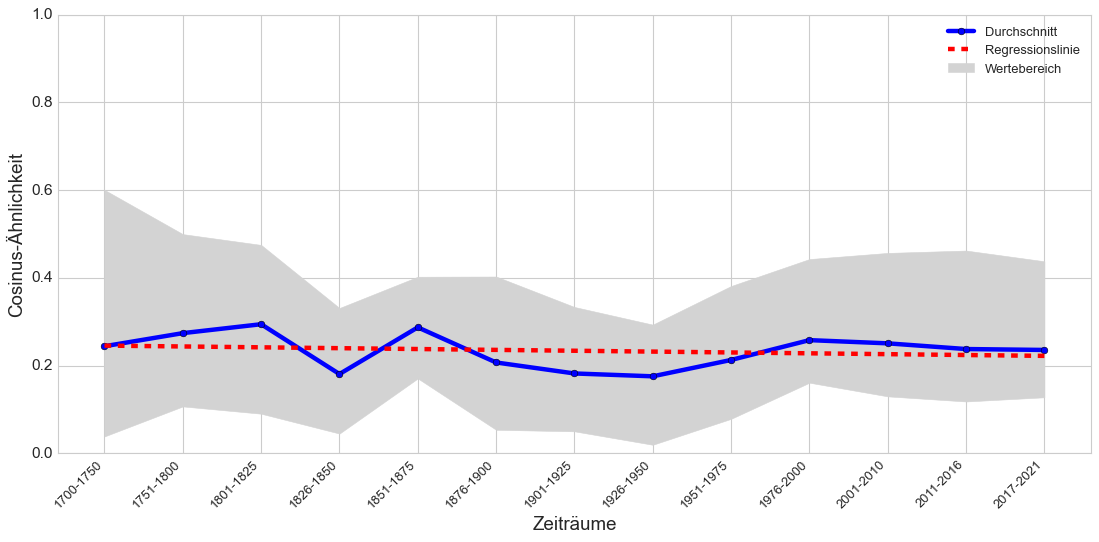

In [31]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(control_mean)))
plt.xticks(ticks=x_indexes, labels=control_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, control_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, control_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, control_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, control_max_list, control_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## Adverbien

### atrocemente

In [32]:
compare_words(periods, models, 'atrocemente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(burlino, 0.9165661931037903)","(rimena, 0.9610433578491211)","(addossarci, 0.9339125752449036)","(sanguinario, 0.8175965547561646)","(tradito, 0.833699107170105)","(scatenato, 0.6732165813446045)","(straziato, 0.7166507840156555)","(dissimulazione, 0.7358793020248413)","(fantasticare, 0.7831714749336243)","(tragicamente, 0.8038740158081055)","(crudeltà, 0.7556048631668091)","(torturare, 0.8163950443267822)","(opprimere, 0.7771081924438477)"
1,"(brille, 0.9154772162437439)","(claustrali, 0.9587916135787964)","(obbrobr, 0.9168102145195007)","(delazione, 0.8060338497161865)","(crudeltà, 0.8328524827957153)","(inflessibile, 0.6691210865974426)","(sofferse, 0.7038035988807678)","(inumano, 0.7276330590248108)","(sconfinato, 0.7720469236373901)","(eroico, 0.775658130645752)","(torturare, 0.7547619938850403)","(trockmorton, 0.7580707669258118)","(elfo, 0.7709271907806396)"
2,"(festeggi, 0.9131049513816833)","(soffrendone, 0.9582376480102539)","(palafreniere, 0.9150637984275818)","(despota, 0.8056125640869141)","(avvilire, 0.8259933590888977)","(complice, 0.6639752984046936)","(prigionia, 0.6800569295883179)","(alzai, 0.7209977507591248)","(lussuria, 0.7359985709190369)","(sgomentante, 0.7596901059150696)","(mutilare, 0.742125928401947)","(malvagio, 0.7407427430152893)","(orrendo, 0.7667957544326782)"
3,"(vergognarse, 0.9118708372116089)","(irriverenza, 0.95783531665802)","(infrenare, 0.9118910431861877)","(mostrandogli, 0.7981479167938232)","(impunito, 0.8228162527084351)","(onta, 0.6427698731422424)","(provandolo, 0.6796458959579468)","(attanagliare, 0.7197827696800232)","(sacrifizi, 0.7346286177635193)","(efferatezza, 0.757869303226471)","(dilaniare, 0.7373417615890503)","(inerme, 0.7388976812362671)","(seviziare, 0.7645707130432129)"
4,"(nferno, 0.9115763902664185)","(soccorrerle, 0.9577057957649231)","(scerno, 0.9111981391906738)","(inimicare, 0.7950267791748047)","(crudelmente, 0.80910325050354)","(ferocia, 0.6356923580169678)","(angosce, 0.6658551692962646)","(tirannide, 0.7160084843635559)","(purifica, 0.7290827631950378)","(castigo, 0.757849931716919)","(orribilmente, 0.733722984790802)","(prostrare, 0.7346569299697876)","(crudele, 0.7589658498764038)"
5,"(indebolirci, 0.9109303951263428)","(covandosi, 0.957041323184967)","(ciònonostante, 0.9062492251396179)","(ravvedere, 0.7937770485877991)","(turpe, 0.8087752461433411)","(insulto, 0.6343954801559448)","(implacabile, 0.6589413285255432)","(divin, 0.7123612761497498)","(scintillo, 0.7255890965461731)","(crudeltà, 0.7552877068519592)","(orrendamente, 0.7288640141487122)","(crudele, 0.734472930431366)","(membra, 0.7588828802108765)"
6,"(vision, 0.9095132946968079)","(ignorate, 0.9569776058197021)","(invendicato, 0.9051707983016968)","(conculcare, 0.7936801314353943)","(incauto, 0.8040294051170349)","(scatenare, 0.6315463185310364)","(uccisione, 0.6536327600479126)","(inarticolato, 0.7028012275695801)","(purificare, 0.7251543998718262)","(perire, 0.753262460231781)","(straziato, 0.7248440384864807)","(delazione, 0.7297093868255615)","(demoniaco, 0.7586653232574463)"
7,"(avventurar, 0.9088595509529114)","(esigerli, 0.9564017057418823)","(decretante, 0.9042028784751892)","(esacerbare, 0.7916725277900696)","(spietato, 0.8025123476982117)","(fomentare, 0.625274658203125)","(scopersi, 0.6522420644760132)","(ferocemente, 0.6987448334693909)","(ardiva, 0.7247115969657898)","(ferocia, 0.7466314435005188)","(avido, 0.7166476249694824)","(straziare, 0.7293455004692078)","(atrocità, 0.7576543688774109)"
8,"(richiamarla, 0.9087954759597778)","(risguardarsi, 0.9561430811882019)","(obbesiani, 0.9037270545959473)","(coonestare, 0.7906798720359802)","(omicidii, 0.8017147183418274)","(vituperare, 0.6241059899330139)","(straziare, 0.6461067199707031)","(ribrezzo, 0.6974747180938721)","(santificare, 0.7230967283248901)","(offesa, 0.745751142501831)","(maledizione, 0

In [33]:
compare_cos(periods, models, 'atrocemente', 'molto')

{'1700-1750': 0.4117667078971863,
 '1751-1800': 0.5246924161911011,
 '1801-1825': 0.4742182493209839,
 '1826-1850': 0.3481162190437317,
 '1851-1875': 0.46310439705848694,
 '1876-1900': 0.3541887402534485,
 '1901-1925': 0.2915773391723633,
 '1926-1950': 0.2678016126155853,
 '1951-1975': 0.2901238203048706,
 '1976-2000': 0.40945133566856384,
 '2001-2010': 0.3426497280597687,
 '2011-2016': 0.29909417033195496,
 '2017-2021': 0.3733021914958954}

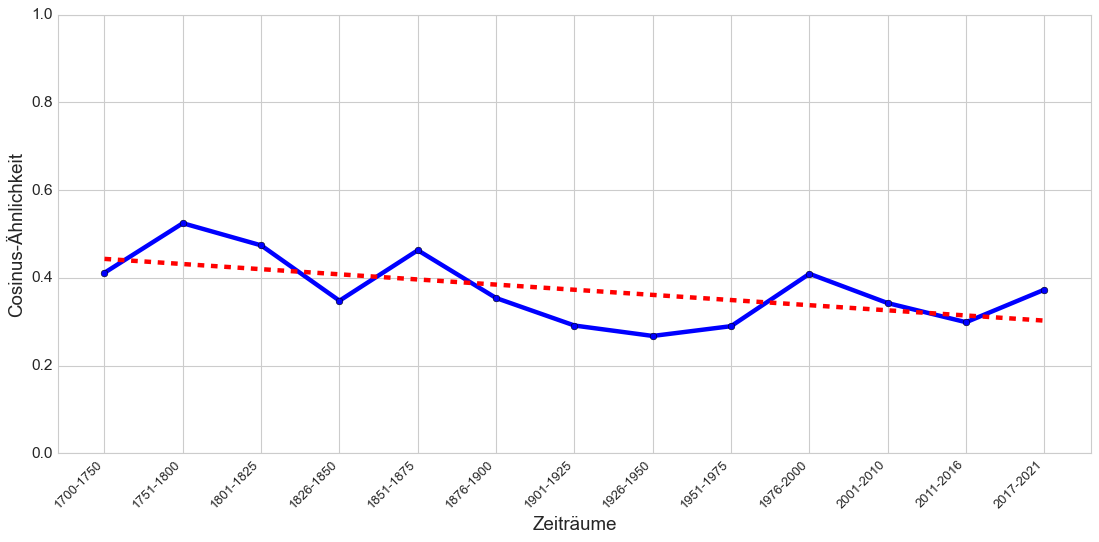

In [34]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

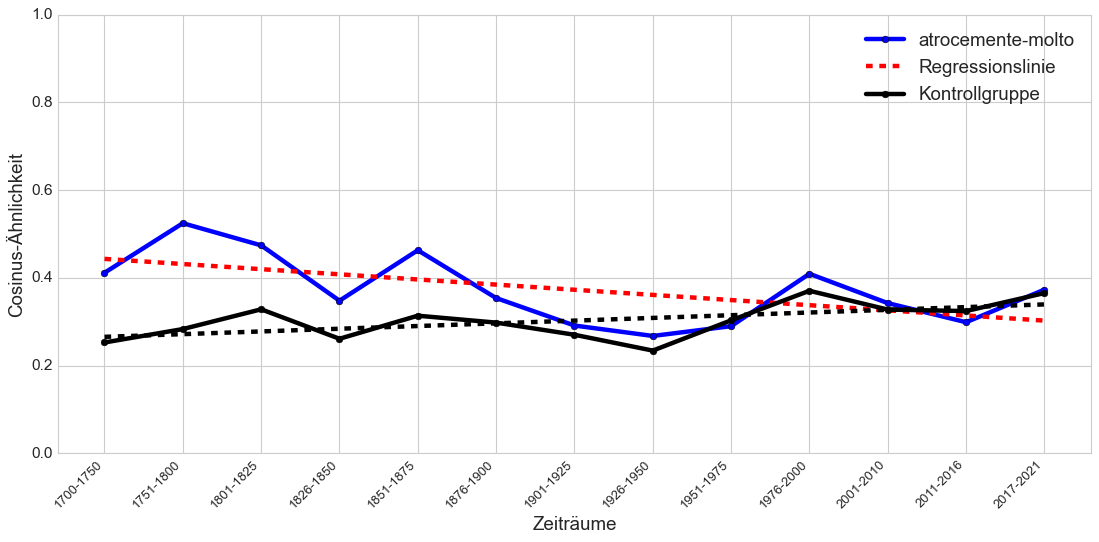

In [35]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'atrocemente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right')

plt.show()

In [36]:
atrocemente1 = compare_cos(periods, models, 'atrocemente', 'angoscia')
atrocemente2 = compare_cos(periods, models, 'atrocemente', 'atterrire')
atrocemente3 = compare_cos(periods, models, 'atrocemente', 'panico')
atrocemente4 = compare_cos(periods, models, 'atrocemente', 'paura')
atrocemente5 = compare_cos(periods, models, 'atrocemente', 'raccapricciare')
atrocemente6 = compare_cos(periods, models, 'atrocemente', 'schifo')
atrocemente7 = compare_cos(periods, models, 'atrocemente', 'sgomentare')
atrocemente8 = compare_cos(periods, models, 'atrocemente', 'sgomento')
atrocemente9 = compare_cos(periods, models, 'atrocemente', 'spaventare')
atrocemente10 = compare_cos(periods, models, 'atrocemente', 'spavento')
atrocemente11 = compare_cos(periods, models, 'atrocemente', 'terrore')

In [37]:
atrocemente1

{'1700-1750': 0.6119540333747864,
 '1751-1800': 0.5178461670875549,
 '1801-1825': 0.5042920708656311,
 '1826-1850': 0.29574254155158997,
 '1851-1875': 0.4901981055736542,
 '1876-1900': 0.32101184129714966,
 '1901-1925': 0.36016154289245605,
 '1926-1950': 0.3541167080402374,
 '1951-1975': 0.4182586967945099,
 '1976-2000': 0.41383975744247437,
 '2001-2010': 0.5350747108459473,
 '2011-2016': 0.5306376218795776,
 '2017-2021': 0.5744973421096802}

In [38]:
atrocemente_df = pd.DataFrame([atrocemente1, atrocemente2, atrocemente3, atrocemente4, atrocemente5, atrocemente6, atrocemente7, atrocemente8, atrocemente9, atrocemente10, atrocemente11])

# Durchschnitt pro Zeitraum
atrocemente_mean = dict(atrocemente_df.mean())

# min pro Zeitraum
atrocemente_min = dict(atrocemente_df.min())
atrocemente_min_list = [float(x) for x in list(atrocemente_min.values())]

#max pro Zeitraum 
atrocemente_max = dict(atrocemente_df.max())
atrocemente_max_list = [float(x) for x in list(atrocemente_max.values())]

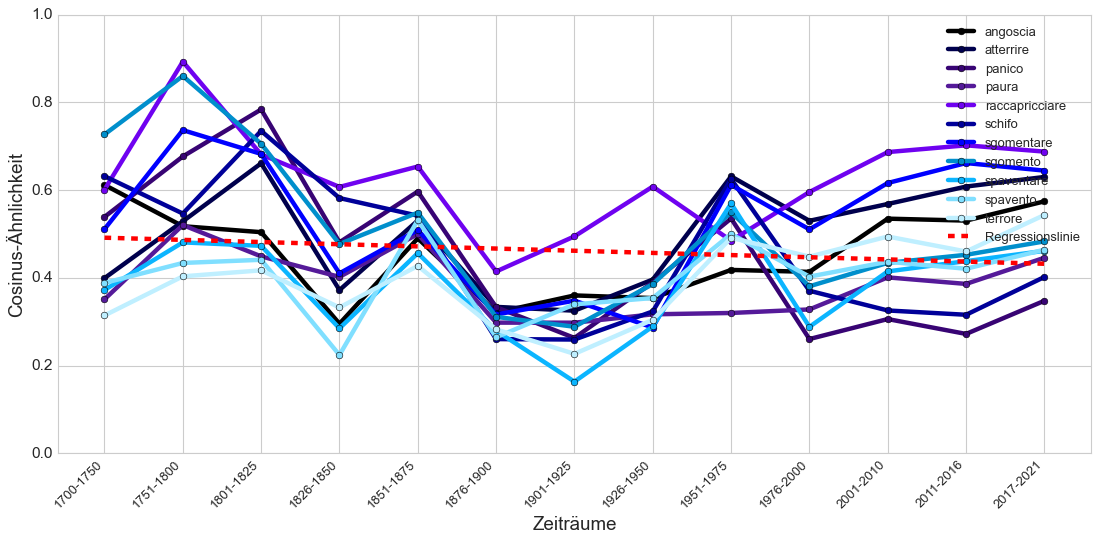

In [39]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, atrocemente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, atrocemente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, atrocemente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, atrocemente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, atrocemente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, atrocemente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, atrocemente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, atrocemente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, atrocemente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, atrocemente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

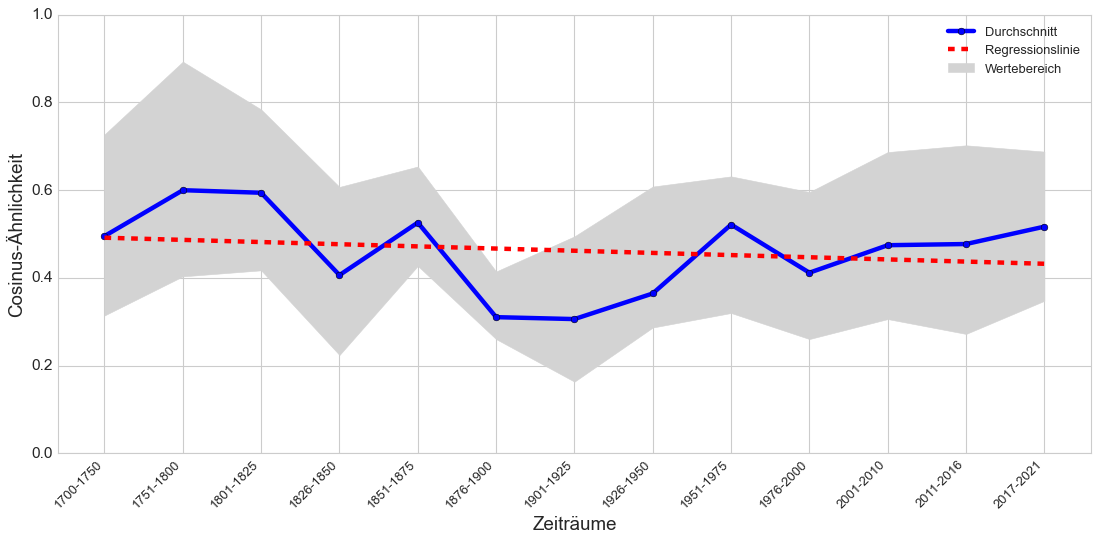

In [40]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

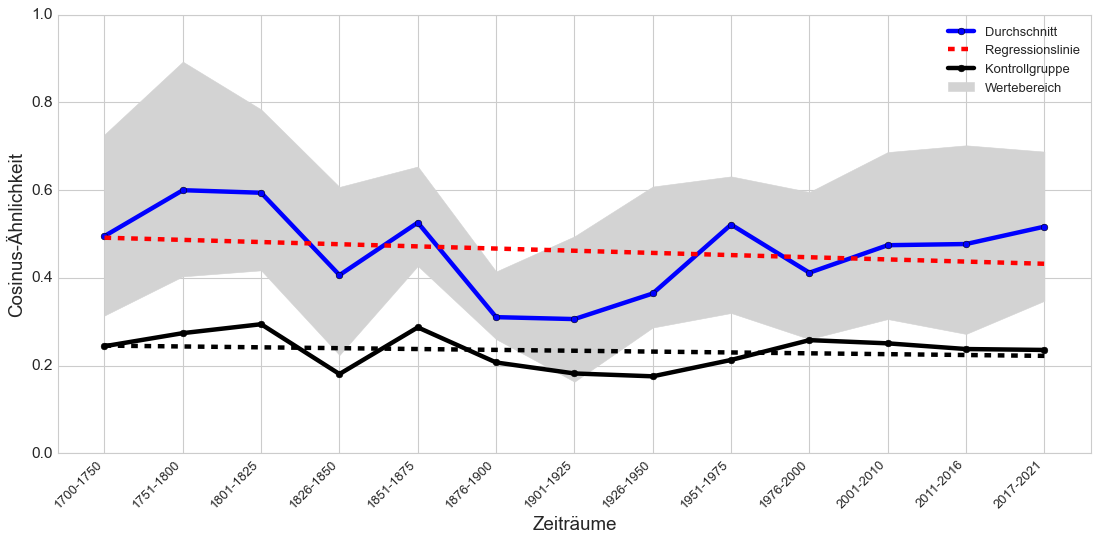

In [41]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(atrocemente_mean)))
plt.xticks(ticks=x_indexes, labels=atrocemente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, atrocemente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, atrocemente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, atrocemente_max_list, atrocemente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(atrocemente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### formidabilmente

In [42]:
compare_words(periods, models, 'formidabilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,not in vocab,"(nodrimento, 0.9589471220970154)","(riseghe, 0.9549697637557983)","(seccarlo, 0.8934151530265808)","(stendesi, 0.7944522500038147)","(compattezza, 0.8439028263092041)",not in vocab,"(xiannian, 0.95795077085495)","(impeto, 0.824764609336853)","(rugoso, 0.8854377865791321)","(percettivo, 0.8722118139266968)"
1,not in vocab,not in vocab,not in vocab,"(perniciosissime, 0.9580268859863281)","(ciglioni, 0.9514492154121399)","(rallent, 0.8901459574699402)","(galliera, 0.7821758985519409)","(durevolmente, 0.8386902213096619)",not in vocab,"(unido, 0.9544956684112549)","(operoso, 0.8012811541557312)","(edipo, 0.8821988701820374)","(sottigliezza, 0.8715955018997192)"
2,not in vocab,not in vocab,not in vocab,"(scrupuloso, 0.9576625227928162)","(racchiuso, 0.9497644901275635)","(volgevasi, 0.8862308263778687)","(pendenza, 0.7687453031539917)","(sopraffatte, 0.8248016834259033)",not in vocab,"(bantustan, 0.954469621181488)","(trasfigurare, 0.7983904480934143)","(pipistrello, 0.8816391825675964)","(dissolvere, 0.8704169988632202)"
3,not in vocab,not in vocab,not in vocab,"(favorevolissime, 0.9560096263885498)","(arrampicate, 0.946633517742157)","(mettiamo, 0.8853822350502014)","(incontrati, 0.7624499201774597)","(adoperato, 0.8236225247383118)",not in vocab,"(sostentamento, 0.9525081515312195)","(protendere, 0.7982207536697388)","(storpiare, 0.8796075582504272)","(trascendere, 0.8688290119171143)"
4,not in vocab,not in vocab,not in vocab,"(interpolatamente, 0.9546817541122437)","(oblunghi, 0.9456360936164856)","(brontolo, 0.8845236301422119)","(telaio, 0.7533823847770691)","(impermeabilità, 0.823403537273407)",not in vocab,"(bardellino, 0.9522460103034973)","(mozzare, 0.797439455986023)","(fugace, 0.8794112801551819)","(dicotomia, 0.8685690760612488)"
5,not in vocab,not in vocab,not in vocab,"(snervato, 0.9543658494949341)","(dellorizzonte, 0.9443592429161072)","(aspettavasi, 0.8839020729064941)","(ruscelletto, 0.7488080859184265)","(ubbriachezza, 0.8233323693275452)",not in vocab,"(coscientemente, 0.9517096281051636)","(compaesano, 0.7890900373458862)","(congiungere, 0.877492368221283)","(intelletto, 0.866607129573822)"
6,not in vocab,not in vocab,not in vocab,"(vegetante, 0.9541845321655273)","(giardiniera, 0.944128155708313)","(tumultuariamente, 0.8835821151733398)","(inseguitore, 0.7479063868522644)","(automatici, 0.8230483531951904)",not in vocab,"(domesticità, 0.9516333341598511)","(sfuggente, 0.7873327732086182)","(avvampare, 0.8744087219238281)","(pulsione, 0.8647295832633972)"
7,not in vocab,not in vocab,not in vocab,"(babele, 0.9529476165771484)","(circolar, 0.9425370097160339)","(costernare, 0.8828494548797607)","(grimaldello, 0.7469958662986755)","(producente, 0.8216451406478882)",not in vocab,"(transeunte, 0.9513179659843445)","(percuotere, 0.7812185883522034)","(tremulo, 0.8737725019454956)","(naturalezza, 0.8602492809295654)"
8,not in vocab,not in vocab,not in vocab,"(preservar, 0.9529404640197754)","(acquaio, 0.9425153732299805)","(ruggiti, 0.882760763168335)","(sperticato, 0.7450538873672485)","(maximum, 0.8206217885017395)",not in vocab,"(elettronica, 0.9505045413970947)","(vigliaccamente, 0.7802568674087524)","(interiorità, 0.873725950717926)","(alterità, 0.8569401502609253)"
9,not in vocab,not in vocab,not in vocab,"(capacita, 0.952931821346283)","(cubo, 0.942220151424408)","(guai, 0.8825157284736633)","(ripieg, 0.7445570826530457)","(interna, 0.8204846382141113)",not in vocab,"(sedizioso, 0.9504881501197815)","(riverberare, 0.7802151441574097)","(indistinto, 0.872235894203186)","(esaltazione, 0.8542317748069763)"


In [43]:
compare_cos(periods, models, 'formidabilmente', 'molto')

{'1826-1850': 0.5100115537643433,
 '1851-1875': 0.46379220485687256,
 '1876-1900': 0.5413740277290344,
 '1901-1925': 0.34810692071914673,
 '1926-1950': 0.3965577483177185,
 '1976-2000': 0.5399901866912842,
 '2001-2010': 0.446534126996994,
 '2011-2016': 0.5148507952690125,
 '2017-2021': 0.5139230489730835}

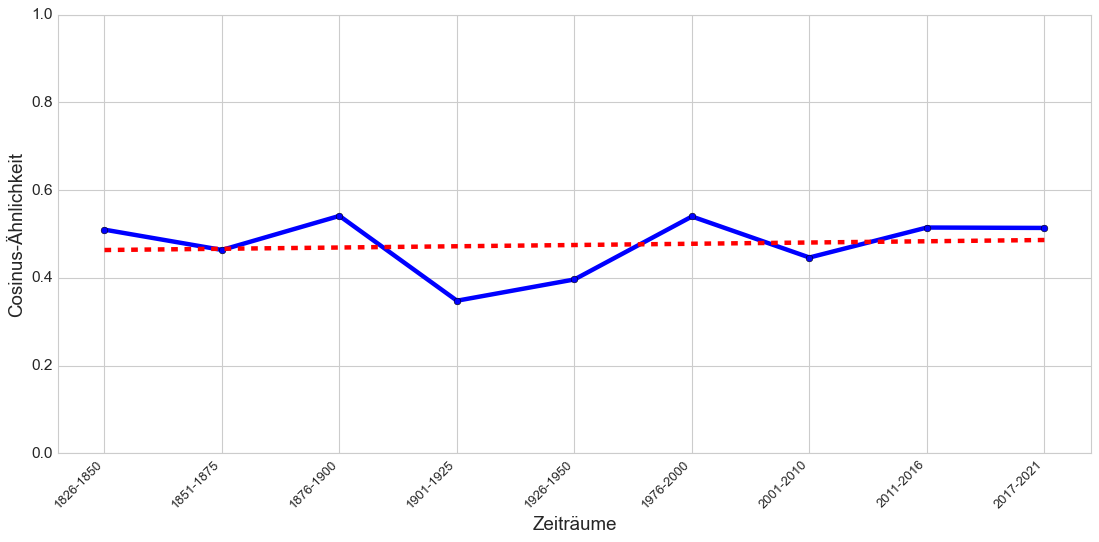

In [44]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'formidabilmente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='atrocemente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [45]:
formidabilmente1 = compare_cos(periods, models, 'formidabilmente', 'angoscia')
formidabilmente2 = compare_cos(periods, models, 'formidabilmente', 'atterrire')
formidabilmente3 = compare_cos(periods, models, 'formidabilmente', 'panico')
formidabilmente4 = compare_cos(periods, models, 'formidabilmente', 'paura')
formidabilmente5 = compare_cos(periods, models, 'formidabilmente', 'raccapricciare')
formidabilmente6 = compare_cos(periods, models, 'formidabilmente', 'schifo')
formidabilmente7 = compare_cos(periods, models, 'formidabilmente', 'sgomentare')
formidabilmente8 = compare_cos(periods, models, 'formidabilmente', 'sgomento')
formidabilmente9 = compare_cos(periods, models, 'formidabilmente', 'spaventare')
formidabilmente10 = compare_cos(periods, models, 'formidabilmente', 'spavento')
formidabilmente11 = compare_cos(periods, models, 'formidabilmente', 'terrore')

In [46]:
formidabilmente_df = pd.DataFrame([formidabilmente1, formidabilmente2, formidabilmente3, formidabilmente4, formidabilmente5, formidabilmente6, formidabilmente7, formidabilmente8, formidabilmente9, formidabilmente10, formidabilmente11])

# Durchschnitt pro Zeitraum
formidabilmente_mean = dict(formidabilmente_df.mean())

# min pro Zeitraum
formidabilmente_min = dict(formidabilmente_df.min())
formidabilmente_min_list = [float(x) for x in list(formidabilmente_min.values())]

#max pro Zeitraum 
formidabilmente_max = dict(formidabilmente_df.max())
formidabilmente_max_list = [float(x) for x in list(formidabilmente_max.values())]

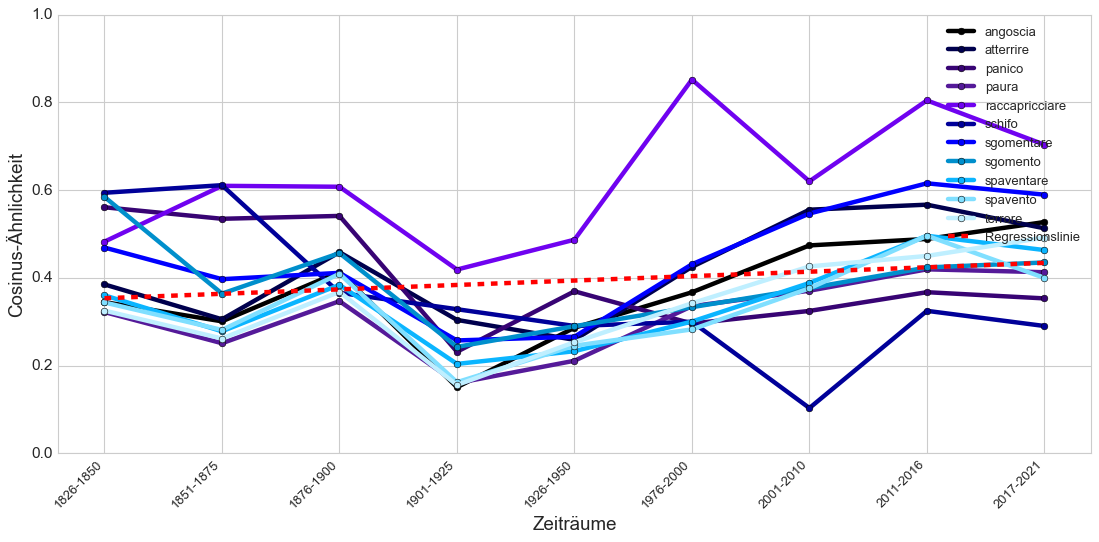

In [47]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, formidabilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, formidabilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, formidabilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, formidabilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, formidabilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, formidabilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, formidabilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, formidabilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, formidabilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, formidabilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

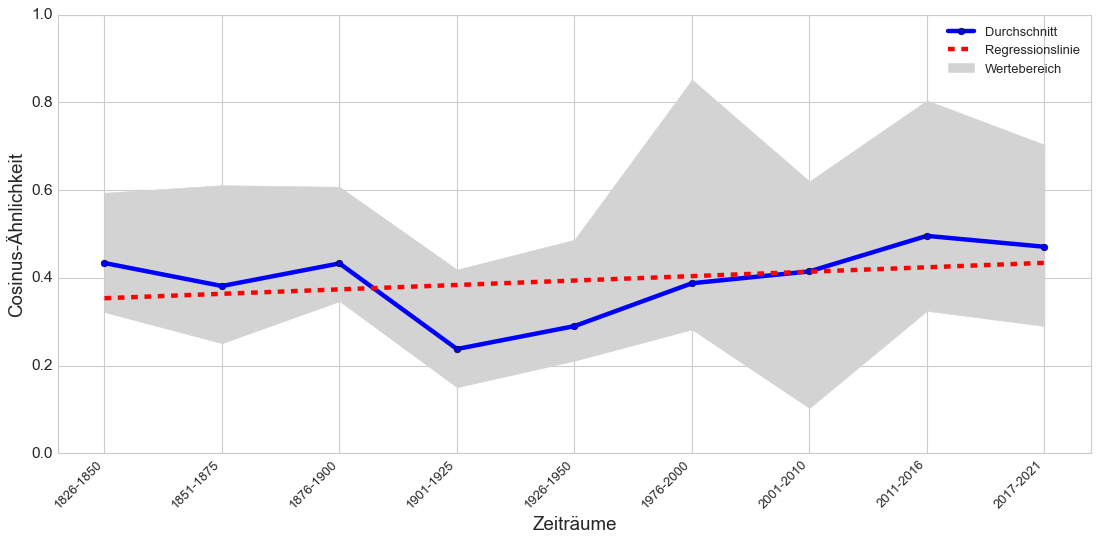

In [48]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(formidabilmente_mean)))
plt.xticks(ticks=x_indexes, labels=formidabilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, formidabilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, formidabilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, formidabilmente_max_list, formidabilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(formidabilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### mostruosamente

In [49]:
compare_words(periods, models, 'mostruosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(deformare, 0.9466858506202698)",not in vocab,"(noufflard, 0.9328871965408325)","(isprezzarla, 0.9488520622253418)","(dissimularlo, 0.9281117916107178)","(laido, 0.8101213574409485)","(sognate, 0.7918822765350342)","(barcolla, 0.7896652221679688)","(sauriani, 0.8984952569007874)","(grintoso, 0.7949923276901245)","(irritante, 0.7217490673065186)","(spaventosamente, 0.7146416902542114)","(spaventosamente, 0.7159745693206787)"
1,"(revoluzioni, 0.9189033508300781)",not in vocab,"(stufi, 0.9290740489959717)","(contraddirmi, 0.9463704228401184)","(irritabile, 0.9274740219116211)","(deforme, 0.790665328502655)","(collerico, 0.7597772479057312)","(occhialone, 0.7850511074066162)","(anemico, 0.7771146297454834)","(irraggiungibile, 0.7948052883148193)","(spaventosamente, 0.7159281373023987)","(tartaro, 0.7111040353775024)","(terribilmente, 0.6902480125427246)"
2,"(sicom, 0.883202314376831)",not in vocab,"(offerirli, 0.9279376268386841)","(ricca, 0.9463083744049072)","(sembrer, 0.9260992407798767)","(magrezza, 0.7891236543655396)","(veggono, 0.7511557340621948)","(semisferici, 0.784496545791626)","(preistorico, 0.7718265056610107)","(somigliante, 0.7946368455886841)","(ruvido, 0.689383864402771)","(seducente, 0.709195077419281)","(tremendamente, 0.6843199729919434)"
3,"(simmetria, 0.8754385113716125)",not in vocab,"(contendi, 0.9267400503158569)","(dativa, 0.9460964798927307)","(abbietta, 0.9197303056716919)","(espression, 0.7880157828330994)","(irreparabilmente, 0.744205892086029)","(zampata, 0.7778631448745728)","(navigabile, 0.7710564136505127)","(spaventosamente, 0.7923969030380249)","(tantino, 0.6757405996322632)","(coinvolgenti, 0.6772212982177734)","(puzzare, 0.6828551888465881)"
4,"(gesuitismo, 0.8733963966369629)",not in vocab,"(pietrone, 0.9265624284744263)","(renderle, 0.945690929889679)","(risolutezza, 0.9160492420196533)","(elasticità, 0.787236750125885)","(insulso, 0.7436853647232056)","(lividore, 0.7732446789741516)","(sfigurati, 0.7703056335449219)","(vocalità, 0.7871710062026978)","(somigliante, 0.6729304790496826)","(enigmatico, 0.6755703091621399)","(opprimente, 0.6819792985916138)"
5,"(introduttavi, 0.8732028007507324)",not in vocab,"(diventer, 0.925390899181366)","(rendervi, 0.944648802280426)","(inorgoglire, 0.9124490022659302)","(indescrivibile, 0.7845354080200195)","(attraenza, 0.7361935973167419)","(ulivigno, 0.7644078731536865)","(semigrattacieli, 0.7702276110649109)","(dotato, 0.7844858765602112)","(tremendamente, 0.672283947467804)","(vivido, 0.6742256283760071)","(oggettivamente, 0.6792004704475403)"
6,"(artifiziata, 0.872715950012207)",not in vocab,"(aíta, 0.9249847531318665)","(sìe, 0.9445831179618835)","(inorridire, 0.9124385118484497)","(improvvisa, 0.7815830707550049)","(spassionato, 0.7319764494895935)","(pagliaccia, 0.7600876092910767)","(proliferare, 0.7679036259651184)","(sbiadito, 0.78000807762146)","(moralista, 0.6719009280204773)","(opprimente, 0.673829197883606)","(insipido, 0.6771820187568665)"
7,"(dallaper, 0.8700780868530273)",not in vocab,"(ambulatorio, 0.9249105453491211)","(compatir, 0.9442570209503174)","(suscettibilità, 0.9108485579490662)","(resistente, 0.7805176377296448)","(agitati, 0.730840265750885)","(aggiustava, 0.7591168284416199)","(risecchiti, 0.7571558952331543)","(provocante, 0.7796013355255127)","(sovrappeso, 0.6667132377624512)","(vagamente, 0.6712146997451782)","(roseo, 0.6729257106781006)"
8,"(dellasacerdote, 0.8699086904525757)",not in vocab,"(cordovese, 0.9246461391448975)","(implume, 0.9441016316413879)","(doppiezza, 0.9098695516586304)","(fluido, 0.776795506477356)","(deformare, 0.7305026650428772)","(tozze, 0.7589259147644043)","(antieconomico, 0.7555410265922546)","(sfacciato, 0.7791822552680969)","(testardo, 0.6643596291542053)","(marmellata, 0.6689135432243347)","(rude, 0.6669530868530273)"
9,"(mediazion, 0.8694980144500732)",not in 

In [50]:
compare_cos(periods, models, 'mostruosamente', 'molto')

{'1700-1750': 0.4749879837036133,
 '1801-1825': 0.5154321789741516,
 '1826-1850': 0.4726622998714447,
 '1851-1875': 0.5994919538497925,
 '1876-1900': 0.45805275440216064,
 '1901-1925': 0.4016115367412567,
 '1926-1950': 0.3443353474140167,
 '1951-1975': 0.4052450358867645,
 '1976-2000': 0.5682957172393799,
 '2001-2010': 0.511066198348999,
 '2011-2016': 0.5131376385688782,
 '2017-2021': 0.4914354979991913}

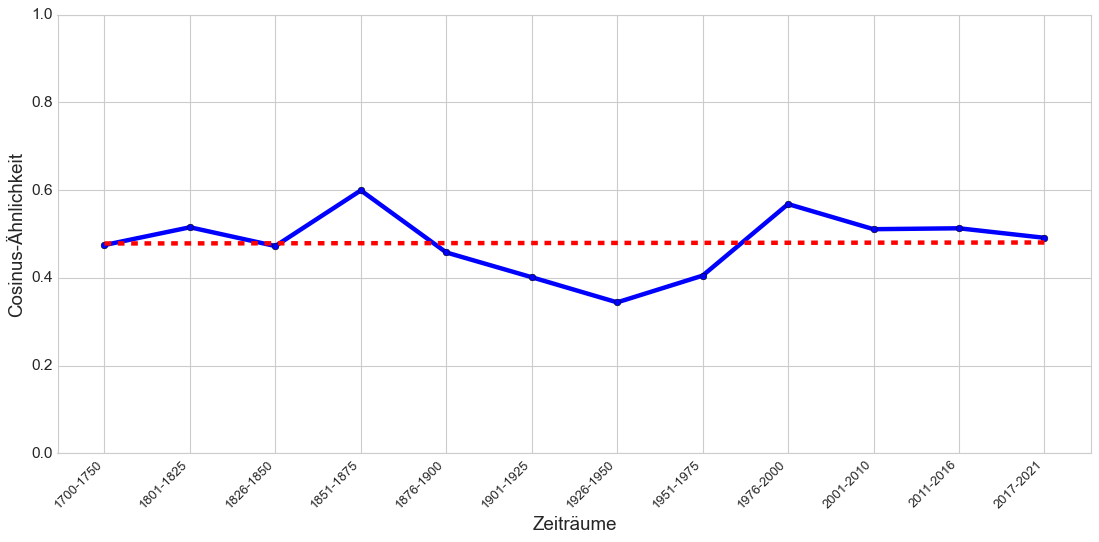

In [51]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'mostruosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='mostruosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [52]:
mostruosamente1 = compare_cos(periods, models, 'mostruosamente', 'angoscia')
mostruosamente2 = compare_cos(periods, models, 'mostruosamente', 'atterrire')
mostruosamente3 = compare_cos(periods, models, 'mostruosamente', 'panico')
mostruosamente4 = compare_cos(periods, models, 'mostruosamente', 'paura')
mostruosamente5 = compare_cos(periods, models, 'mostruosamente', 'raccapricciare')
mostruosamente6 = compare_cos(periods, models, 'mostruosamente', 'schifo')
mostruosamente7 = compare_cos(periods, models, 'mostruosamente', 'sgomentare')
mostruosamente8 = compare_cos(periods, models, 'mostruosamente', 'sgomento')
mostruosamente9 = compare_cos(periods, models, 'mostruosamente', 'spaventare')
mostruosamente10 = compare_cos(periods, models, 'mostruosamente', 'spavento')
mostruosamente11 = compare_cos(periods, models, 'mostruosamente', 'terrore')

In [53]:
mostruosamente_df = pd.DataFrame([mostruosamente1, mostruosamente2, mostruosamente3, mostruosamente4, mostruosamente5, mostruosamente6, mostruosamente7, mostruosamente8, mostruosamente9, mostruosamente10, mostruosamente11])

# Durchschnitt pro Zeitraum
mostruosamente_mean = dict(mostruosamente_df.mean())

# min pro Zeitraum
mostruosamente_min = dict(mostruosamente_df.min())
mostruosamente_min_list = [float(x) for x in list(mostruosamente_min.values())]

#max pro Zeitraum 
mostruosamente_max = dict(mostruosamente_df.max())
mostruosamente_max_list = [float(x) for x in list(mostruosamente_max.values())]

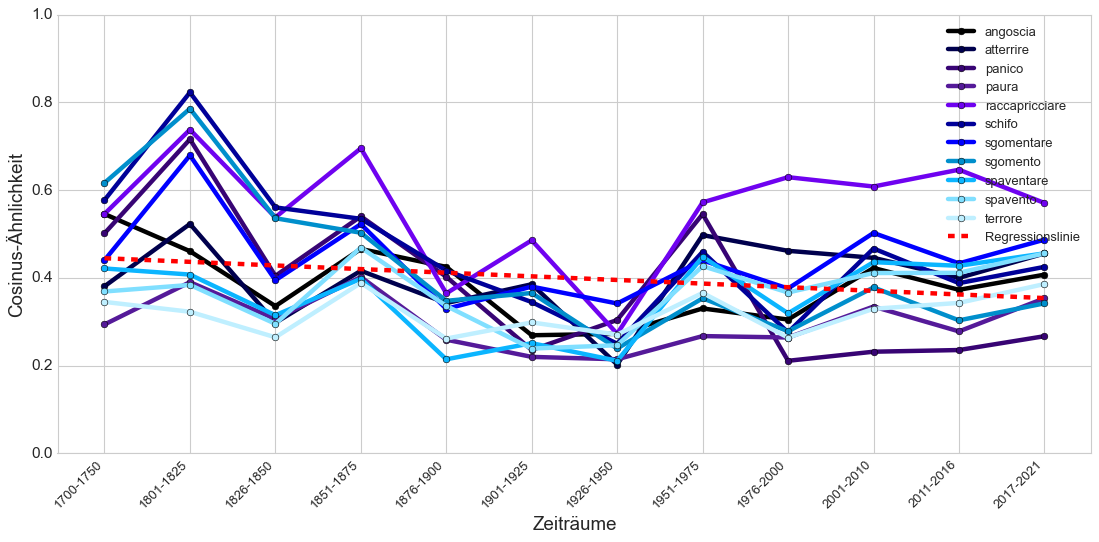

In [54]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, mostruosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, mostruosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, mostruosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, mostruosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, mostruosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, mostruosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, mostruosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, mostruosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, mostruosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, mostruosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

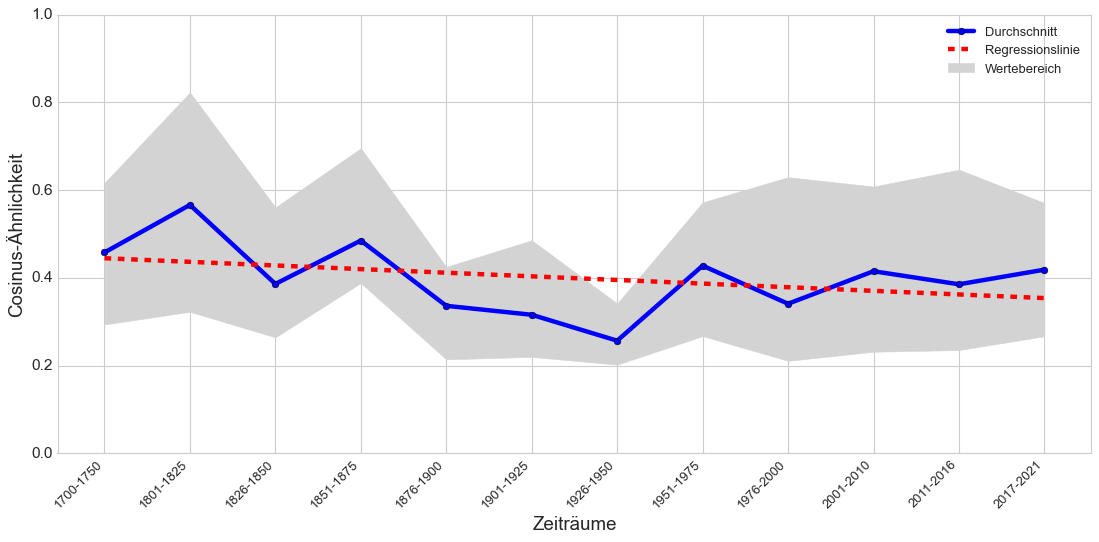

In [55]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(mostruosamente_mean)))
plt.xticks(ticks=x_indexes, labels=mostruosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, mostruosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, mostruosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, mostruosamente_max_list, mostruosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(mostruosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orrendamente

In [56]:
compare_words(periods, models, 'orrendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(lavarlo, 0.9750624895095825)",not in vocab,"(austri, 0.9198050498962402)","(invasata, 0.8879459500312805)","(dilatato, 0.917011559009552)","(dragone, 0.7433281540870667)","(felino, 0.7816969156265259)","(avvertiva, 0.7621201872825623)","(cuorcontento, 0.8492376208305359)","(mutilare, 0.8640201687812805)","(mutilare, 0.8137782216072083)","(mutilare, 0.8749723434448242)","(mutilare, 0.8303355574607849)"
1,"(bagn, 0.9587567448616028)",not in vocab,"(nugolo, 0.9089658856391907)","(atre, 0.8607431650161743)","(pallidezza, 0.911393940448761)","(fucci, 0.740382730960846)","(spaccare, 0.7660049796104431)","(sgomitolate, 0.739453136920929)","(bentidona, 0.8425664901733398)","(orribilmente, 0.8272376656532288)","(orribilmente, 0.8005346655845642)","(orribilmente, 0.8212238550186157)","(orribilmente, 0.800640881061554)"
2,"(omicido, 0.9558693170547485)",not in vocab,"(spumosi, 0.9058851599693298)","(estranie, 0.8422983884811401)","(macchiato, 0.909408450126648)","(pantera, 0.7321203947067261)","(ruggiva, 0.7629076242446899)","(cadevan, 0.7253749370574951)","(piagare, 0.838032603263855)","(mutilato, 0.8185513019561768)","(sfigurato, 0.7808035612106323)","(sfigurato, 0.8039379715919495)","(sfigurato, 0.7984896898269653)"
3,"(mostrolle, 0.9522637724876404)",not in vocab,"(roco, 0.905539870262146)","(glincendi, 0.842208206653595)","(stravolgere, 0.9046866297721863)","(abborrito, 0.725936770439148)","(deturpato, 0.7594554424285889)","(insudiciarsi, 0.7157657146453857)","(giaciglio, 0.8356896042823792)","(sfigurato, 0.8036476373672485)","(sfigurare, 0.737762451171875)","(straziare, 0.7907145619392395)","(seviziare, 0.7933188676834106)"
4,"(desinando, 0.944362998008728)",not in vocab,"(spandea, 0.903643012046814)","(dellaustro, 0.8421220779418945)","(inumidire, 0.8994612693786621)","(gittarsi, 0.7258284687995911)","(insanguinare, 0.7578456997871399)","(vischioso, 0.7141488790512085)","(crocifissi, 0.834799587726593)","(sfigurati, 0.7845226526260376)","(deformare, 0.7289440631866455)","(fanciulla, 0.7625000476837158)","(sfigurare, 0.7874442338943481)"
5,"(chiudimi, 0.9426150918006897)",not in vocab,"(ruggito, 0.9033588767051697)","(gemea, 0.8364819288253784)","(cadaverico, 0.898977518081665)","(sguainare, 0.7233218550682068)","(ischeletrito, 0.7513388395309448)","(scarnate, 0.7108101844787598)","(sportellone, 0.8249784708023071)","(straziato, 0.7792975306510925)","(atrocemente, 0.7288639545440674)","(atterrite, 0.7580969929695129)","(straziare, 0.7715739607810974)"
6,"(sfrondare, 0.9423381090164185)",not in vocab,"(scotendo, 0.9014549851417542)","(formidato, 0.834042489528656)","(bagliore, 0.881780743598938)","(allibire, 0.7212690114974976)","(inerme, 0.750601053237915)","(brulica, 0.7105029821395874)","(quietamente, 0.8243401646614075)","(massacrare, 0.7662445902824402)","(straziato, 0.7271008491516113)","(livido, 0.7569836974143982)","(straziato, 0.7636934518814087)"
7,"(voltasi, 0.9420379996299744)",not in vocab,"(atra, 0.9012426733970642)","(luragano, 0.8332157135009766)","(affilato, 0.8816852569580078)","(indomito, 0.7206587195396423)","(stramazzare, 0.750141441822052)","(dolorante, 0.7094637751579285)","(piumina, 0.8235530257225037)","(torturato, 0.7660764455795288)","(sfigurati, 0.7248976230621338)","(membra, 0.7556682825088501)","(giacere, 0.7572933435440063)"
8,"(rideano, 0.9416695237159729)",not in vocab,"(muggire, 0.9009929895401001)","(ispido, 0.8327792882919312)","(sfavillare, 0.8793209195137024)","(imbelle, 0.7203961610794067)","(mutilare, 0.7463180422782898)","(scoppia, 0.7068684697151184)","(ciabattare, 0.8223764300346375)","(cadavere, 0.7627246379852295)","(crudeltà, 0.7099604606628418)","(trucidare, 0.7536291480064392)","(deturpare, 0.7555165886878967)"
9,"(mbusto, 0.9413657784461975)",not in vocab,"(rauco, 0.9003047347068787)","(lorica, 0.8320668339729309)","(vampa, 0.8790510296821594)","(bronc

In [57]:
compare_cos(periods, models, 'orrendamente', 'molto')

{'1700-1750': 0.43254342675209045,
 '1801-1825': 0.36244794726371765,
 '1826-1850': 0.30202746391296387,
 '1851-1875': 0.45670822262763977,
 '1876-1900': 0.3357897996902466,
 '1901-1925': 0.21957141160964966,
 '1926-1950': 0.2611696422100067,
 '1951-1975': 0.2455601990222931,
 '1976-2000': 0.23263685405254364,
 '2001-2010': 0.29100504517555237,
 '2011-2016': 0.270713210105896,
 '2017-2021': 0.2485424280166626}

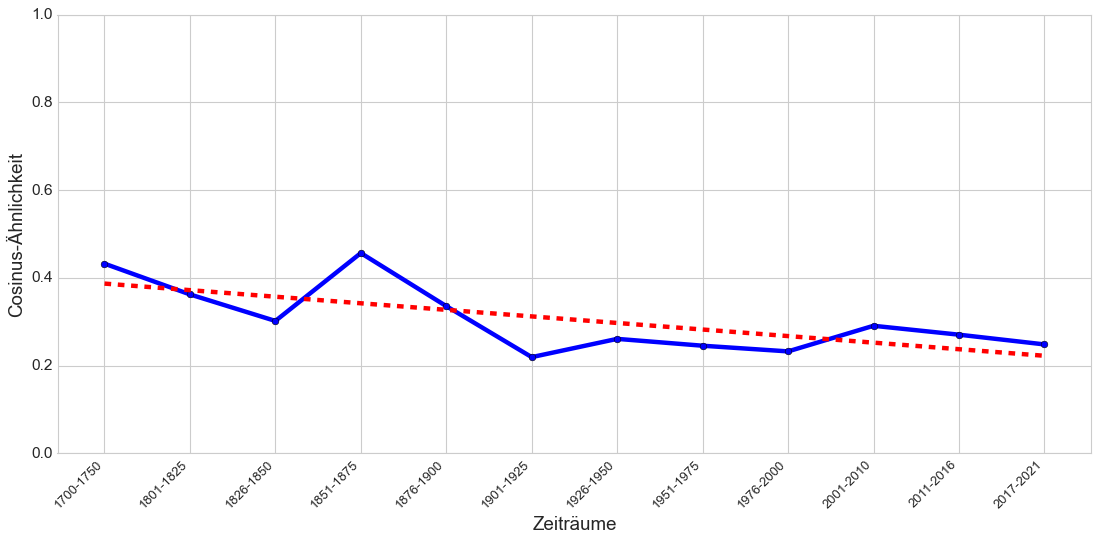

In [58]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orrendamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='orrendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [59]:
orrendamente1 = compare_cos(periods, models, 'orrendamente', 'angoscia')
orrendamente2 = compare_cos(periods, models, 'orrendamente', 'atterrire')
orrendamente3 = compare_cos(periods, models, 'orrendamente', 'panico')
orrendamente4 = compare_cos(periods, models, 'orrendamente', 'paura')
orrendamente5 = compare_cos(periods, models, 'orrendamente', 'raccapricciare')
orrendamente6 = compare_cos(periods, models, 'orrendamente', 'schifo')
orrendamente7 = compare_cos(periods, models, 'orrendamente', 'sgomentare')
orrendamente8 = compare_cos(periods, models, 'orrendamente', 'sgomento')
orrendamente9 = compare_cos(periods, models, 'orrendamente', 'spaventare')
orrendamente10 = compare_cos(periods, models, 'orrendamente', 'spavento')
orrendamente11 = compare_cos(periods, models, 'orrendamente', 'terrore')

In [60]:
orrendamente_df = pd.DataFrame([orrendamente1, orrendamente2, orrendamente3, orrendamente4, orrendamente5, orrendamente6, orrendamente7, orrendamente8, orrendamente9, orrendamente10, orrendamente11])

# Durchschnitt pro Zeitraum
orrendamente_mean = dict(orrendamente_df.mean())

# min pro Zeitraum
orrendamente_min = dict(orrendamente_df.min())
orrendamente_min_list = [float(x) for x in list(orrendamente_min.values())]

#max pro Zeitraum 
orrendamente_max = dict(orrendamente_df.max())
orrendamente_max_list = [float(x) for x in list(orrendamente_max.values())]

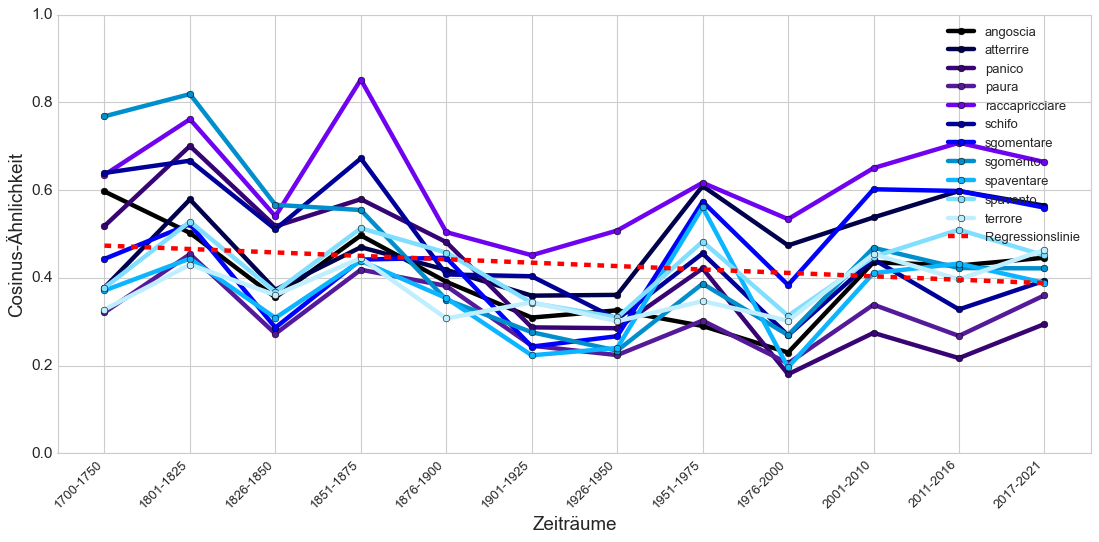

In [61]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orrendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orrendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orrendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orrendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orrendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orrendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orrendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orrendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orrendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orrendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

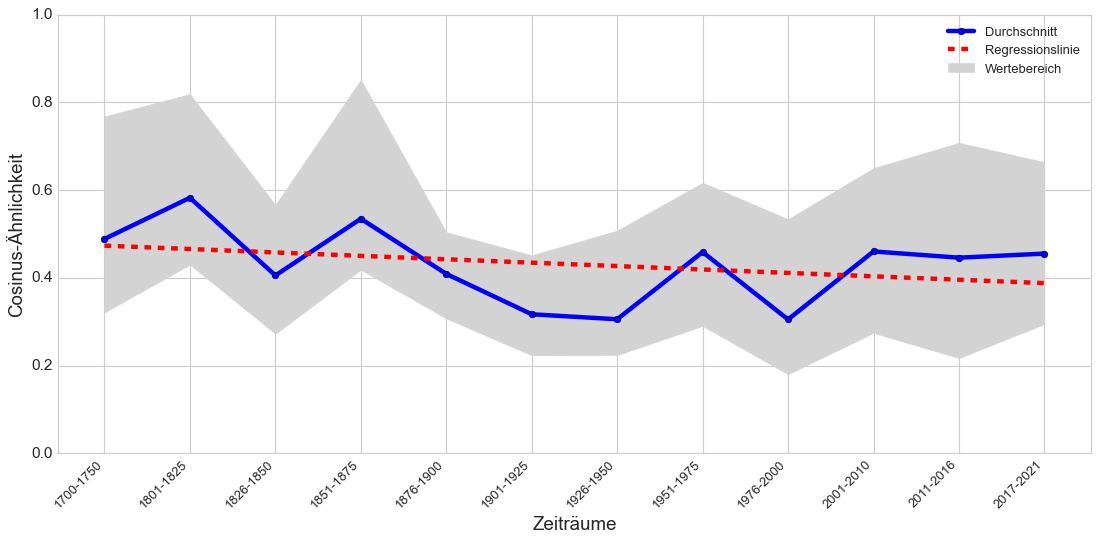

In [62]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orrendamente_mean)))
plt.xticks(ticks=x_indexes, labels=orrendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orrendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orrendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orrendamente_max_list, orrendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orrendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### orribilmente

In [63]:
compare_words(periods, models, 'orribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(aquilonar, 0.8381785750389099)","(nuda, 0.865541934967041)","(gel, 0.8267900943756104)","(montagne, 0.7963154315948486)","(digrignare, 0.8097057342529297)","(ruggire, 0.5922986268997192)","(annojata, 0.6007910370826721)","(rantolare, 0.6611130833625793)","(trasformarvisi, 0.7378311157226562)","(orrendamente, 0.8272377252578735)","(orrendamente, 0.8005346655845642)","(orrendamente, 0.8212238550186157)","(orrendamente, 0.8006407618522644)"
1,"(sultan, 0.8246415853500366)","(fischiare, 0.8593856692314148)","(rizzarsi, 0.8216939568519592)","(rimbombar, 0.7580544948577881)","(rantolo, 0.7890973091125488)","(spaventosamente, 0.5843496918678284)","(rummo, 0.5790291428565979)","(imbavagliare, 0.6539226174354553)","(ombelicale, 0.7150252461433411)","(mutilare, 0.8176729679107666)","(atrocemente, 0.733722984790802)","(mutilare, 0.7536869645118713)","(sfigurare, 0.7687553763389587)"
2,"(ceffo, 0.818599283695221)","(ultrice, 0.8537403345108032)","(brandire, 0.8201996088027954)","(nuoto, 0.7527628540992737)","(contorcere, 0.7813332676887512)","(attanagliare, 0.5776825547218323)","(ruggiva, 0.5790054798126221)","(ossesso, 0.6034913063049316)","(strutto, 0.7120814323425293)","(sfigurato, 0.8099645972251892)","(mutilare, 0.6931166648864746)","(sfigurato, 0.7312835454940796)","(mutilare, 0.7661301493644714)"
3,"(turbin, 0.8143321871757507)","(acciaro, 0.8491363525390625)","(scoraggiare, 0.8154752254486084)","(cava, 0.7521855235099792)","(pallidezza, 0.7765489220619202)","(bargello, 0.5775930285453796)","(impallidì, 0.5725317597389221)","(strapparne, 0.6019478440284729)","(frustino, 0.7107033133506775)","(mutilato, 0.7873823642730713)","(sfigurato, 0.6884533166885376)","(atrocemente, 0.7152602672576904)","(sfigurato, 0.7524689435958862)"
4,"(ruggire, 0.808790922164917)","(teschio, 0.8489990234375)","(ostello, 0.8151575922966003)","(grandine, 0.7482226490974426)","(ghiacciato, 0.7743927240371704)","(sanguinare, 0.5720553994178772)","(deformerò, 0.5693264007568359)","(batúffoli, 0.6004753112792969)","(inebetire, 0.7106220722198486)","(straziato, 0.7775546908378601)","(sfigurare, 0.6645001769065857)","(straziare, 0.7056586742401123)","(atrocemente, 0.750423014163971)"
5,"(mugge, 0.8059430718421936)","(cocito, 0.845427393913269)","(gittarlo, 0.8149900436401367)","(rinserrare, 0.7478465437889099)","(convulsione, 0.7729548215866089)","(mutilare, 0.5628238916397095)","(tracollaron, 0.5563435554504395)","(ventose, 0.5995683670043945)","(rattoppati, 0.7076137661933899)","(torturato, 0.767463743686676)","(deformare, 0.6596474051475525)","(deformare, 0.6985675692558289)","(straziato, 0.7314763069152832)"
6,"(stridere, 0.8042777180671692)","(gorgo, 0.8453431725502014)","(stupefatta, 0.8136557936668396)","(penuriosissimi, 0.7443238496780396)","(mascella, 0.7714369893074036)","(stramazzare, 0.5624602437019348)","(insolazioni, 0.5547346472740173)","(abbandonasti, 0.5979160666465759)","(infuocato, 0.7050154805183411)","(sfigurati, 0.7613556981086731)","(mostruosamente, 0.6581966876983643)","(contorto, 0.6974834203720093)","(seviziare, 0.7244017720222473)"
7,"(balzan, 0.8034064173698425)","(solco, 0.84518963098526)","(nimiche, 0.8124663829803467)","(intronare, 0.7443056702613831)","(orrendamente, 0.767821729183197)","(sguainare, 0.5622884631156921)","(sfigurare, 0.5479779839515686)","(ghermiva, 0.594134509563446)","(balzelloni, 0.7029972076416016)","(mutilati, 0.7433223128318787)","(atterrita, 0.6490032076835632)","(membra, 0.695945680141449)","(giacere, 0.7091419696807861)"
8,"(angui, 0.8002297282218933)","(teso, 0.8449206352233887)","(adamantino, 0.8118993043899536)","(scompigliare, 0.742438793182373)","(tremito, 0.7669649720191956)","(motteggi, 0.5617740154266357)","(imo, 0.5467144250869751)","(spennare, 0.5934203863143921)","(granturco, 0.7022653818130493)","(ustionato, 0.7428515553474426)","(spaventosamente, 0.6339690685272

In [64]:
compare_cos(periods, models, 'orribilmente', 'molto')

{'1700-1750': 0.19437028467655182,
 '1751-1800': 0.33612126111984253,
 '1801-1825': 0.4330589473247528,
 '1826-1850': 0.28097203373908997,
 '1851-1875': 0.408164918422699,
 '1876-1900': 0.3689514696598053,
 '1901-1925': 0.2399509996175766,
 '1926-1950': 0.2757185101509094,
 '1951-1975': 0.25219690799713135,
 '1976-2000': 0.27591419219970703,
 '2001-2010': 0.2805314064025879,
 '2011-2016': 0.28745195269584656,
 '2017-2021': 0.2828586995601654}

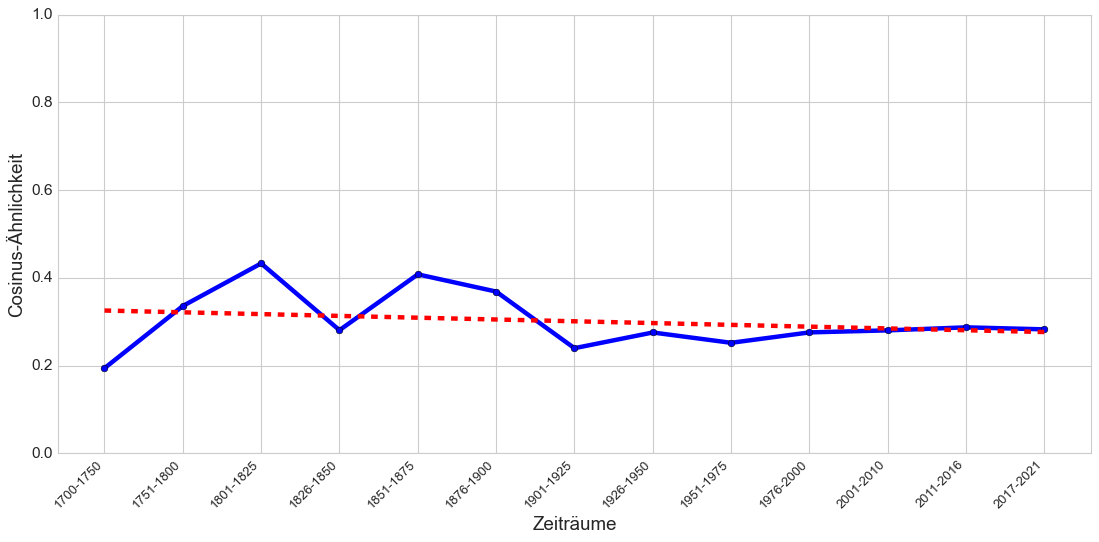

In [65]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'orribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='orribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [66]:
orribilmente1 = compare_cos(periods, models, 'orribilmente', 'angoscia')
orribilmente2 = compare_cos(periods, models, 'orribilmente', 'atterrire')
orribilmente3 = compare_cos(periods, models, 'orribilmente', 'panico')
orribilmente4 = compare_cos(periods, models, 'orribilmente', 'paura')
orribilmente5 = compare_cos(periods, models, 'orribilmente', 'raccapricciare')
orribilmente6 = compare_cos(periods, models, 'orribilmente', 'schifo')
orribilmente7 = compare_cos(periods, models, 'orribilmente', 'sgomentare')
orribilmente8 = compare_cos(periods, models, 'orribilmente', 'sgomento')
orribilmente9 = compare_cos(periods, models, 'orribilmente', 'spaventare')
orribilmente10 = compare_cos(periods, models, 'orribilmente', 'spavento')
orribilmente11 = compare_cos(periods, models, 'orribilmente', 'terrore')

In [67]:
orribilmente_df = pd.DataFrame([orribilmente1, orribilmente2, orribilmente3, orribilmente4, orribilmente5, orribilmente6, orribilmente7, orribilmente8, orribilmente9, orribilmente10, orribilmente11])

# Durchschnitt pro Zeitraum
orribilmente_mean = dict(orribilmente_df.mean())

# min pro Zeitraum
orribilmente_min = dict(orribilmente_df.min())
orribilmente_min_list = [float(x) for x in list(orribilmente_min.values())]

#max pro Zeitraum 
orribilmente_max = dict(orribilmente_df.max())
orribilmente_max_list = [float(x) for x in list(orribilmente_max.values())]

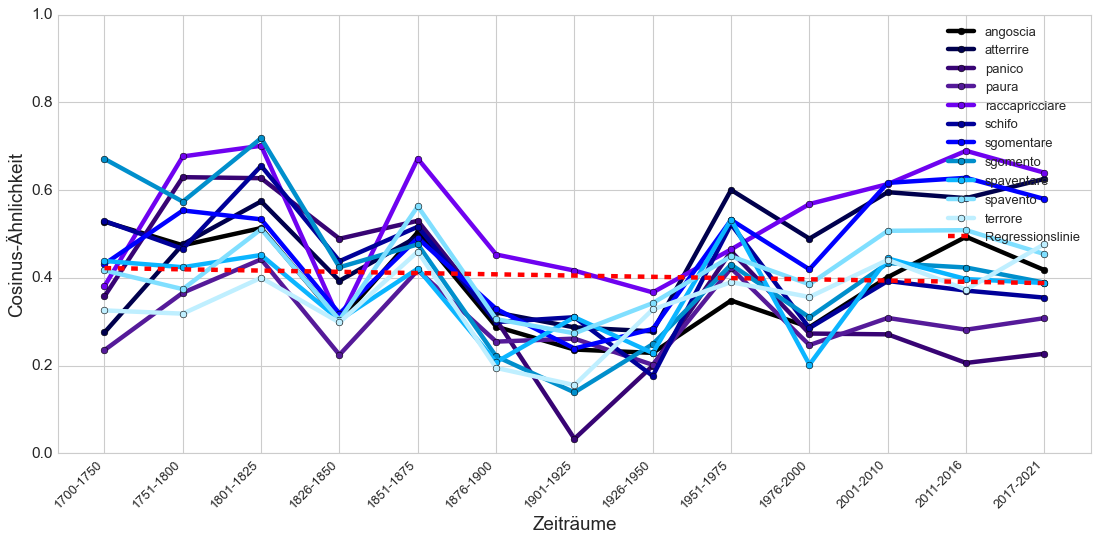

In [68]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, orribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, orribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, orribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, orribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, orribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, orribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, orribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, orribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, orribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, orribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

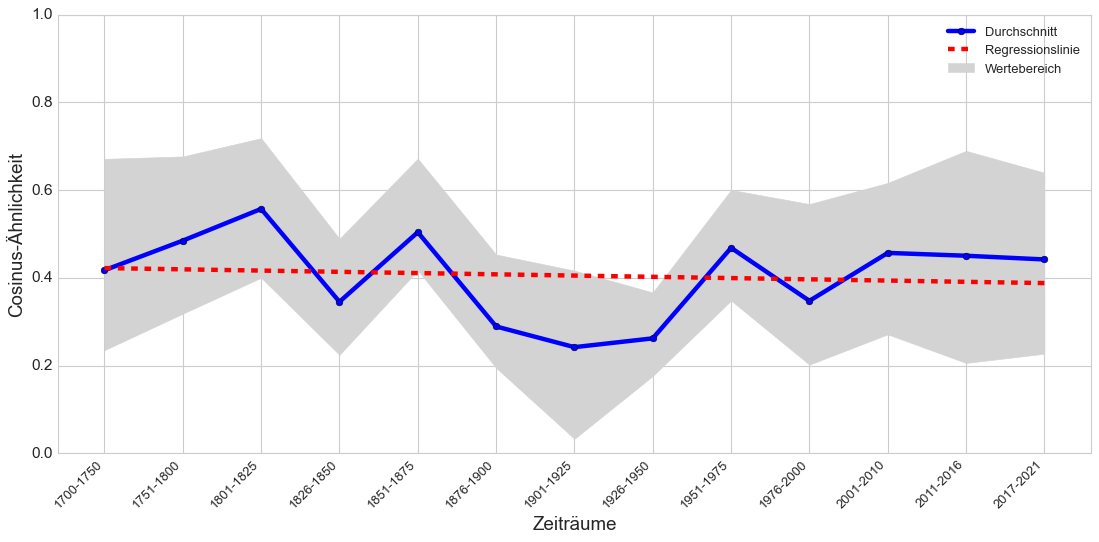

In [69]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(orribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=orribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, orribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, orribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, orribilmente_max_list, orribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(orribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### spaventosamente

In [70]:
compare_words(periods, models, 'spaventosamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(eruzione, 0.8067677617073059)","(repristinavasi, 0.98687744140625)","(spezzati, 0.9503887295722961)","(bisognò, 0.958573579788208)","(sfolgorare, 0.8620627522468567)","(parossismo, 0.7562662959098816)","(ruggiva, 0.6730964183807373)","(stravolto, 0.6928151249885559)","(belluina, 0.7226406931877136)","(mostruosamente, 0.7923970818519592)","(mostruosamente, 0.7159280776977539)","(mostruosamente, 0.714641809463501)","(mostruosamente, 0.7159744501113892)"
1,"(pestilenza, 0.7982960343360901)","(colimbo, 0.9519448280334473)","(guatò, 0.9495730400085449)","(disseppellire, 0.9174690842628479)","(imperversare, 0.8609057068824768)","(impallidì, 0.7531918883323669)","(livido, 0.6650320291519165)","(pronunziarlo, 0.672968327999115)","(omone, 0.7135068774223328)","(contaminare, 0.7396445274353027)","(terribilmente, 0.6549354195594788)","(terribilmente, 0.6719673871994019)","(terribilmente, 0.6995654106140137)"
2,"(vesuvio, 0.7972626686096191)","(libecchio, 0.9486151337623596)","(esce, 0.949216902256012)","(sentendoli, 0.8995996713638306)","(fioccare, 0.8588284254074097)","(sanguinolento, 0.7490127682685852)","(mazzolata, 0.643008291721344)","(dilatate, 0.6641650199890137)","(ombelicale, 0.6720638871192932)","(sbiadito, 0.7394670248031616)","(tremendamente, 0.635087251663208)","(tetro, 0.6662471294403076)","(opprimente, 0.6764671206474304)"
3,"(tremuoti, 0.7838460803031921)","(caspio, 0.9463868737220764)","(minacciava, 0.9475629329681396)","(numerarsi, 0.89168381690979)","(nuoto, 0.852119505405426)","(riscossa, 0.7489636540412903)","(pavidità, 0.639733076095581)","(dentatura, 0.6349700689315796)","(odiata, 0.6706234216690063)","(arido, 0.7379146218299866)","(orribilmente, 0.6339690089225769)","(ruga, 0.6644357442855835)","(tremendamente, 0.6690499782562256)"
4,"(fumare, 0.7760030627250671)","(muggir, 0.9452407956123352)","(recan, 0.947400689125061)","(melma, 0.8836573958396912)","(furiosamente, 0.8514460325241089)","(ripiombare, 0.7463041543960571)","(felino, 0.6260379552841187)","(tanaglia, 0.6329857707023621)","(entusiasti, 0.6627630591392517)","(ahimè, 0.7350946664810181)","(mostruoso, 0.5971269011497498)","(insensibile, 0.664409339427948)","(talmente, 0.6664320826530457)"
5,"(sacrilega, 0.7725971937179565)","(succede, 0.9442403316497803)","(cingimi, 0.9472846984863281)","(strofinarlo, 0.8834640979766846)","(spazzare, 0.8498178720474243)","(irrefrenabile, 0.7414735555648804)","(dilatò, 0.6125739812850952)","(terreo, 0.6298229694366455)","(nugolo, 0.660668134689331)","(deforme, 0.7281206250190735)","(atrocemente, 0.5920181274414062)","(raccapricciare, 0.6519895195960999)","(riflessivo, 0.6633087992668152)"
6,"(allagare, 0.7635071277618408)","(sommerga, 0.9426384568214417)","(ricuoprono, 0.9465478658676147)","(scheggie, 0.882013201713562)","(marosi, 0.8483997583389282)","(dilatare, 0.7412291765213013)","(marzioli, 0.6110154986381531)","(sbarrato, 0.620818555355072)","(improbo, 0.6595106720924377)","(lineamento, 0.7279094457626343)","(invisibile, 0.5900743007659912)","(seducente, 0.650682270526886)","(roseo, 0.6500078439712524)"
7,"(vomitate, 0.7626485228538513)","(vacillo, 0.94190913438797)","(scompiglia, 0.945117175579071)","(ulcerare, 0.8814452886581421)","(malandrino, 0.8476778864860535)","(compresso, 0.7393198609352112)","(rovesciandolo, 0.6100463271141052)","(aspettanti, 0.6200008988380432)","(ciarliero, 0.6584915518760681)","(replicante, 0.7247424721717834)","(mammifero, 0.5873899459838867)","(opprimente, 0.6481077075004578)","(monotono, 0.6487479209899902)"
8,"(errutazioni, 0.7619891166687012)","(imperversare, 0.9404627084732056)","(togliesi, 0.944773256778717)","(sfracellare, 0.8807104229927063)","(mitraglia, 0.8471714854240417)","(penosamente, 0.7381765842437744)","(omar, 0.6084474325180054)","(scintillavano, 0.6153796911239624)","(bobet, 0.6550742387771606)","(irraggiungibile, 0.7211731672286987)"

In [71]:
compare_cos(periods, models, 'spaventosamente', 'molto')

{'1700-1750': 0.3179510533809662,
 '1751-1800': 0.45183610916137695,
 '1801-1825': 0.35307708382606506,
 '1826-1850': 0.37564969062805176,
 '1851-1875': 0.4546806514263153,
 '1876-1900': 0.4588611423969269,
 '1901-1925': 0.27290794253349304,
 '1926-1950': 0.271314412355423,
 '1951-1975': 0.33443042635917664,
 '1976-2000': 0.5467682480812073,
 '2001-2010': 0.4156457781791687,
 '2011-2016': 0.4415591061115265,
 '2017-2021': 0.48331522941589355}

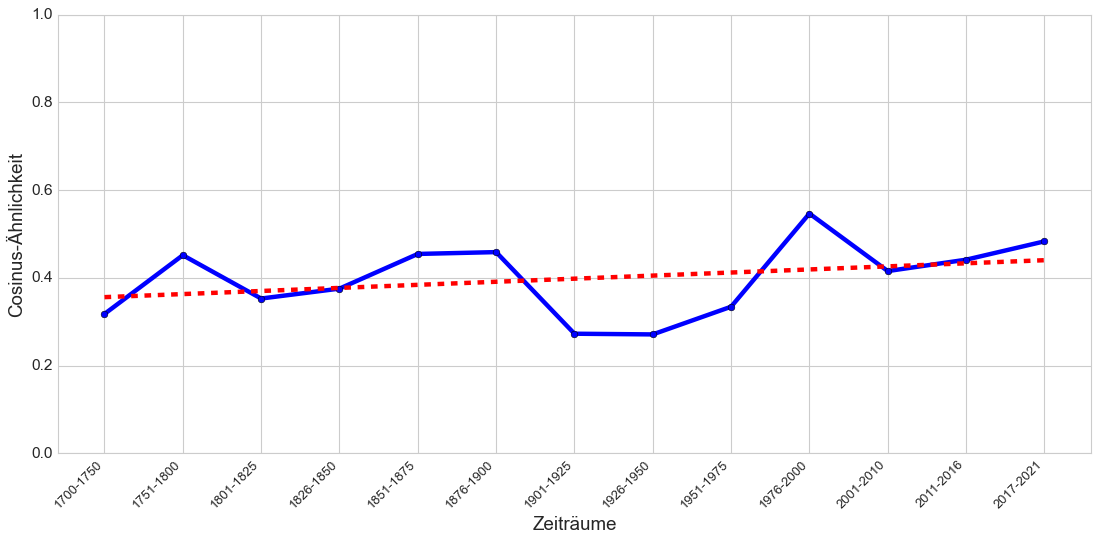

In [72]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

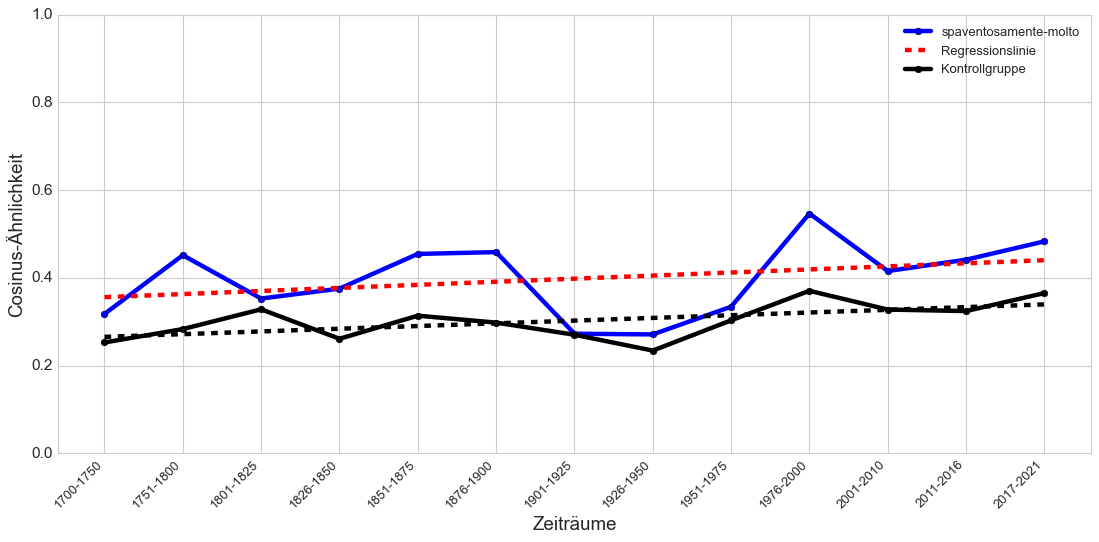

In [73]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'spaventosamente', 'molto')
x_indexes = np.arange(len(data))
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)
plt.plot(x_indexes, data.values(), label='spaventosamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

# Kontrollgruppe
plt.plot(x_indexes, molto_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(molto_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

In [74]:
spaventosamente1 = compare_cos(periods, models, 'spaventosamente', 'angoscia')
spaventosamente2 = compare_cos(periods, models, 'spaventosamente', 'atterrire')
spaventosamente3 = compare_cos(periods, models, 'spaventosamente', 'panico')
spaventosamente4 = compare_cos(periods, models, 'spaventosamente', 'paura')
spaventosamente5 = compare_cos(periods, models, 'spaventosamente', 'raccapricciare')
spaventosamente6 = compare_cos(periods, models, 'spaventosamente', 'schifo')
spaventosamente7 = compare_cos(periods, models, 'spaventosamente', 'sgomentare')
spaventosamente8 = compare_cos(periods, models, 'spaventosamente', 'sgomento')
spaventosamente9 = compare_cos(periods, models, 'spaventosamente', 'spaventare')
spaventosamente10 = compare_cos(periods, models, 'spaventosamente', 'spavento')
spaventosamente11 = compare_cos(periods, models, 'spaventosamente', 'terrore')

In [75]:
spaventosamente_df = pd.DataFrame([spaventosamente1, spaventosamente2, spaventosamente3, spaventosamente4, spaventosamente5, spaventosamente6, spaventosamente7, spaventosamente8, spaventosamente9, spaventosamente10, spaventosamente11])

# Durchschnitt pro Zeitraum
spaventosamente_mean = dict(spaventosamente_df.mean())

# min pro Zeitraum
spaventosamente_min = dict(spaventosamente_df.min())
spaventosamente_min_list = [float(x) for x in list(spaventosamente_min.values())]

#max pro Zeitraum 
spaventosamente_max = dict(spaventosamente_df.max())
spaventosamente_max_list = [float(x) for x in list(spaventosamente_max.values())]

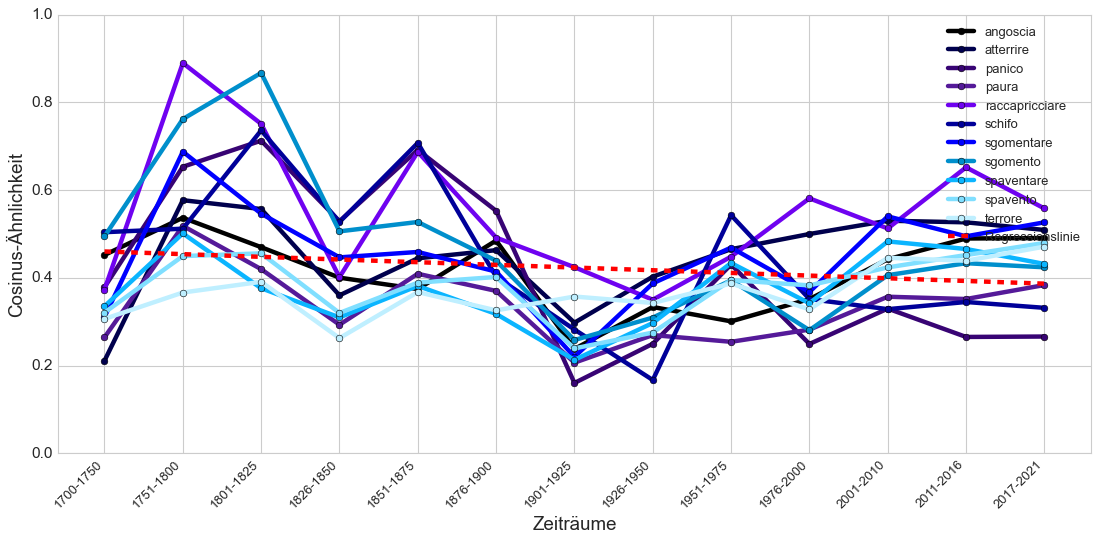

In [76]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, spaventosamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, spaventosamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, spaventosamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, spaventosamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, spaventosamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, spaventosamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, spaventosamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, spaventosamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, spaventosamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, spaventosamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

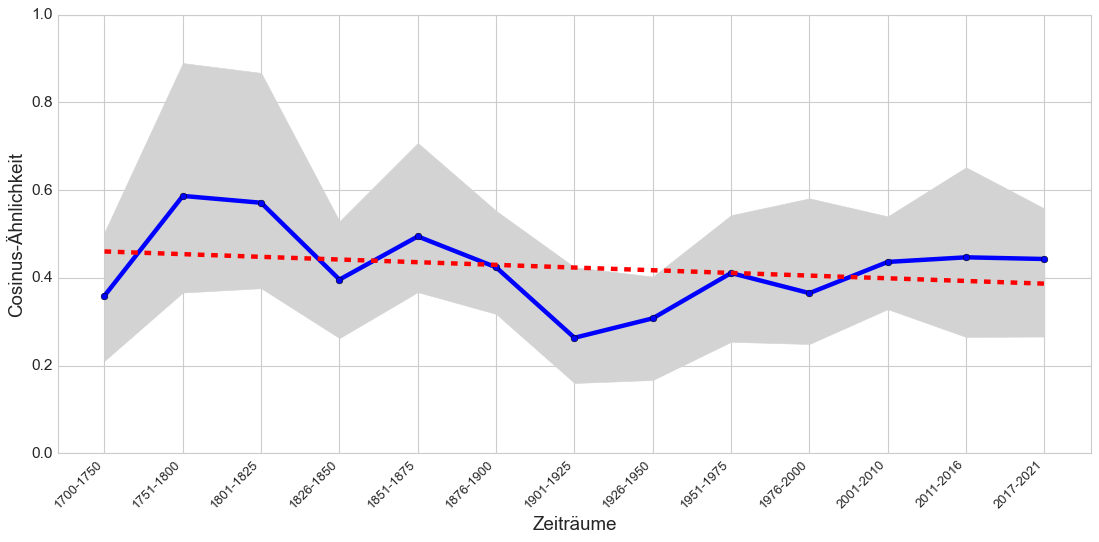

In [77]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right', fontsize='small')

plt.show()

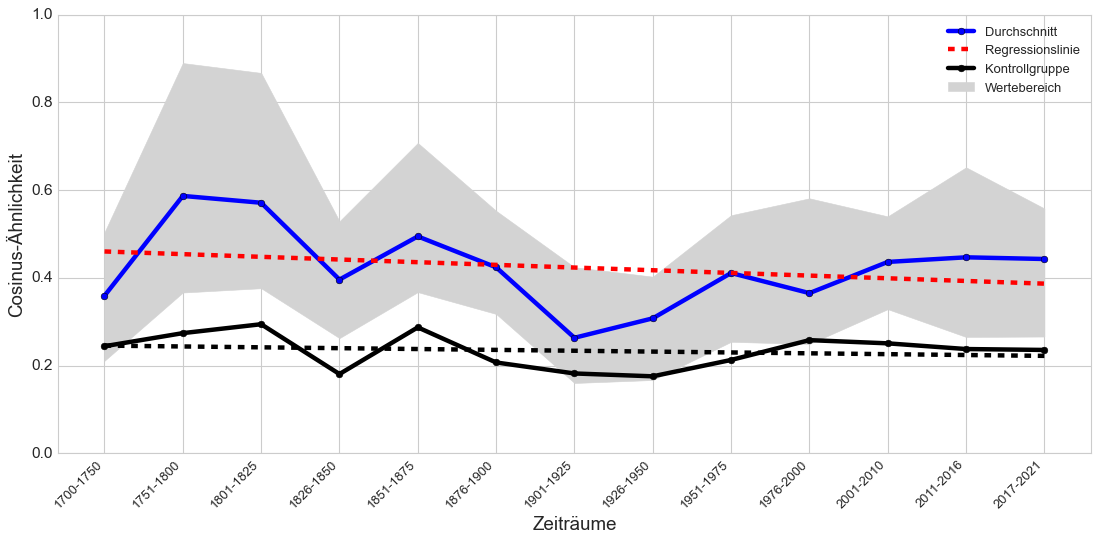

In [78]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(spaventosamente_mean)))
plt.xticks(ticks=x_indexes, labels=spaventosamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, spaventosamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, spaventosamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, spaventosamente_max_list, spaventosamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(spaventosamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### terribilmente

In [79]:
compare_words(periods, models, 'terribilmente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,"(impreso, 0.814724862575531)","(laconico, 0.8071576356887817)","(strappazzi, 0.8459259867668152)","(pontificj, 0.7674705982208252)","(sentivasi, 0.7967002391815186)","(leonessa, 0.6343045234680176)","(zuccone, 0.6210200786590576)","(divago, 0.598381519317627)","(pover, 0.6910313963890076)","(tremendamente, 0.7989006638526917)","(tremendamente, 0.7981178760528564)","(tremendamente, 0.818004310131073)","(tremendamente, 0.78297358751297)"
1,"(imola, 0.8093146681785583)","(vespasiana, 0.7883267402648926)","(ilse, 0.8386730551719666)","(kur, 0.7653114199638367)","(convulso, 0.7942582964897156)","(esplodere, 0.6195949912071228)","(vanamente, 0.5983595252037048)","(incomposto, 0.5922573804855347)","(accidentato, 0.6759098172187805)","(estremamente, 0.5963438749313354)","(spaventosamente, 0.6549354195594788)","(spaventosamente, 0.6719673275947571)","(spaventosamente, 0.6995654106140137)"
2,"(malvezzi, 0.8004848957061768)","(eusino, 0.7779828310012817)","(ritrarnelo, 0.8368359208106995)","(schioppi, 0.7618653178215027)","(tuda, 0.7878721356391907)","(fiero, 0.5969496965408325)","(nominargli, 0.5778411030769348)","(passacantando, 0.5833154916763306)","(ascolta, 0.6502265930175781)","(egoista, 0.5868870615959167)","(mostruosamente, 0.6506281495094299)","(mostruosamente, 0.6133565306663513)","(mostruosamente, 0.6902479529380798)"
3,"(oranges, 0.7981716394424438)","(sovversione, 0.7684944868087769)","(ciarliera, 0.8361009359359741)","(incantare, 0.7554091215133667)","(afferrarmi, 0.7817925810813904)","(dinnanzi, 0.5962845683097839)","(andromaco, 0.5654566287994385)","(marzocco, 0.5508033037185669)","(rimuginare, 0.649730920791626)","(goffo, 0.5758246779441833)","(atrocemente, 0.5953472256660461)","(orribilmente, 0.6068924069404602)","(cinico, 0.6611765623092651)"
4,"(cesena, 0.7970278263092041)","(democratica, 0.7665877938270569)","(crudelmente, 0.8358498811721802)","(maltrattati, 0.7553667426109314)","(salirmi, 0.7801998853683472)","(caparbietà, 0.5962401032447815)","(odiava, 0.5567917227745056)","(opprimendolo, 0.538467526435852)","(unome, 0.6446614861488342)","(ingenuo, 0.5721464157104492)","(orribilmente, 0.586595892906189)","(noioso, 0.5966830253601074)","(apparentemente, 0.6570753455162048)"
5,"(cicilia, 0.7933558225631714)","(barbarico, 0.7665356397628784)","(sconciare, 0.8355919718742371)","(esplosione, 0.7505089044570923)","(berardo, 0.7747724056243896)","(annientare, 0.5957723259925842)","(nelli, 0.5533083081245422)","(astanti, 0.5369471907615662)","(brontolone, 0.6446356177330017)","(spaventosamente, 0.5638543367385864)","(angosciante, 0.5525544285774231)","(egoista, 0.586694598197937)","(insicuro, 0.6523033380508423)"
6,"(lugo, 0.7883806228637695)","(aquilea, 0.7632963061332703)","(paralizzare, 0.8352693915367126)","(fù, 0.7501377463340759)","(stravolgere, 0.7735602259635925)","(carneficina, 0.5952781438827515)","(sferza, 0.5399296283721924)","(balzandoci, 0.5350251793861389)","(scolorire, 0.639390766620636)","(complicare, 0.5625640153884888)","(angosciare, 0.5493817329406738)","(angoscianti, 0.5810052752494812)","(opprimente, 0.6456334590911865)"
7,"(guern, 0.7875811457633972)","(rampanto, 0.7624344825744629)","(taciturnità, 0.8341325521469116)","(scoprir, 0.7481223344802856)","(sveglio, 0.7725992798805237)","(inessere, 0.593334972858429)","(esaltamento, 0.5389811992645264)","(maceri, 0.5283311009407043)","(malconcio, 0.6393864750862122)","(noioso, 0.5588849782943726)","(noioso, 0.5426307320594788)","(angosciare, 0.5808389782905579)","(sarcasmo, 0.6371465921401978)"
8,"(riservadi, 0.7863460183143616)","(pentapoli, 0.7619495987892151)","(uretra, 0.8328840136528015)","(ingiurie, 0.7457059621810913)","(picchio, 0.7710104584693909)","(sentesi, 0.5907574892044067)","(ninotto, 0.5346620082855225)","(ascoltavo, 0.5274068713188171)","(emozionati, 0.6362513899803162)","(talmente, 0.558474063873291)","(pr

In [80]:
compare_cos(periods, models, 'terribilmente', 'molto')

{'1700-1750': 0.3655394911766052,
 '1751-1800': 0.4103897511959076,
 '1801-1825': 0.5446373224258423,
 '1826-1850': 0.44962456822395325,
 '1851-1875': 0.4961048364639282,
 '1876-1900': 0.3939725458621979,
 '1901-1925': 0.33730509877204895,
 '1926-1950': 0.33198943734169006,
 '1951-1975': 0.4335115849971771,
 '1976-2000': 0.4943014681339264,
 '2001-2010': 0.38159817457199097,
 '2011-2016': 0.4259306788444519,
 '2017-2021': 0.45705604553222656}

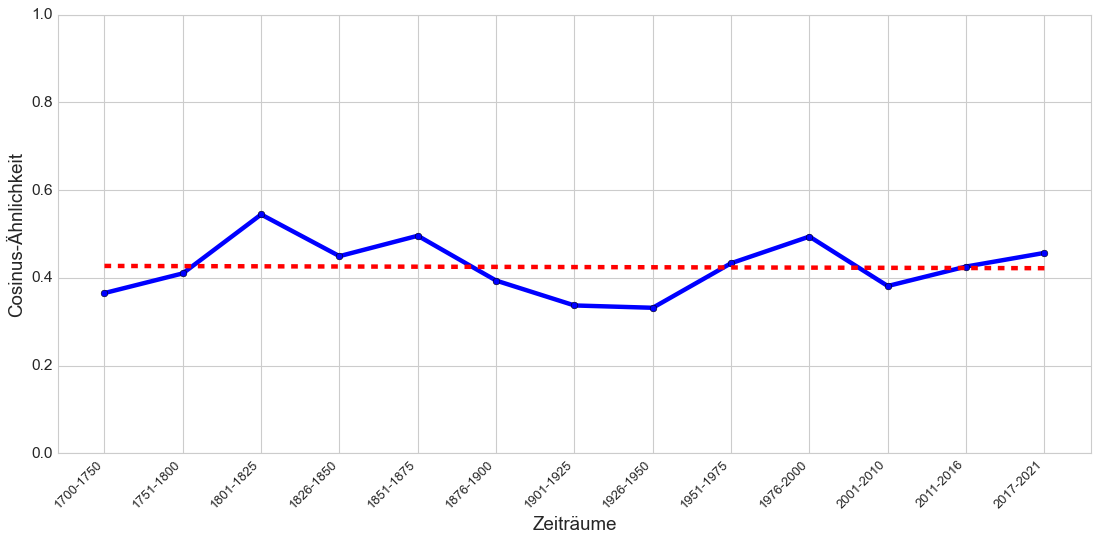

In [81]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'terribilmente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='terribilmente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [82]:
terribilmente1 = compare_cos(periods, models, 'terribilmente', 'angoscia')
terribilmente2 = compare_cos(periods, models, 'terribilmente', 'atterrire')
terribilmente3 = compare_cos(periods, models, 'terribilmente', 'panico')
terribilmente4 = compare_cos(periods, models, 'terribilmente', 'paura')
terribilmente5 = compare_cos(periods, models, 'terribilmente', 'raccapricciare')
terribilmente6 = compare_cos(periods, models, 'terribilmente', 'schifo')
terribilmente7 = compare_cos(periods, models, 'terribilmente', 'sgomentare')
terribilmente8 = compare_cos(periods, models, 'terribilmente', 'sgomento')
terribilmente9 = compare_cos(periods, models, 'terribilmente', 'spaventare')
terribilmente10 = compare_cos(periods, models, 'terribilmente', 'spavento')
terribilmente11 = compare_cos(periods, models, 'terribilmente', 'terrore')

In [83]:
terribilmente_df = pd.DataFrame([terribilmente1, terribilmente2, terribilmente3, terribilmente4, terribilmente5, terribilmente6, terribilmente7, terribilmente8, terribilmente9, terribilmente10, terribilmente11])

# Durchschnitt pro Zeitraum
terribilmente_mean = dict(terribilmente_df.mean())

# min pro Zeitraum
terribilmente_min = dict(terribilmente_df.min())
terribilmente_min_list = [float(x) for x in list(terribilmente_min.values())]

#max pro Zeitraum 
terribilmente_max = dict(terribilmente_df.max())
terribilmente_max_list = [float(x) for x in list(terribilmente_max.values())]

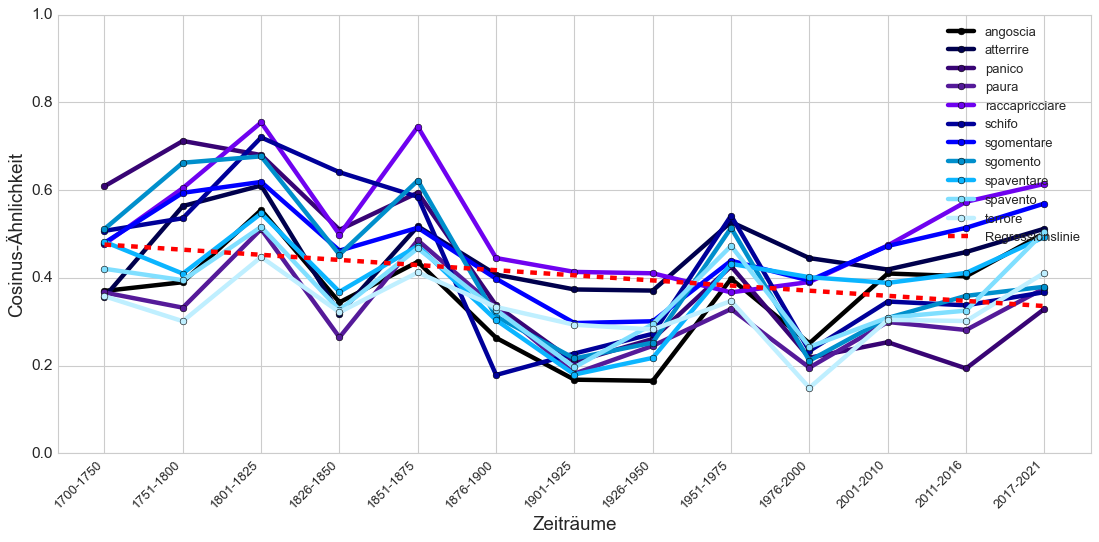

In [84]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, terribilmente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, terribilmente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, terribilmente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, terribilmente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, terribilmente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, terribilmente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, terribilmente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, terribilmente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, terribilmente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, terribilmente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

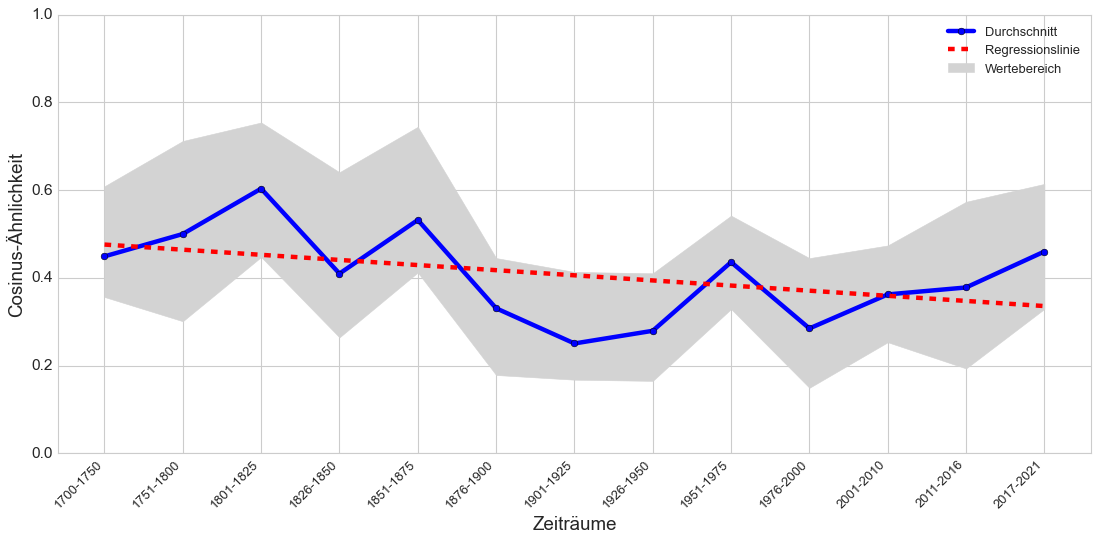

In [85]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

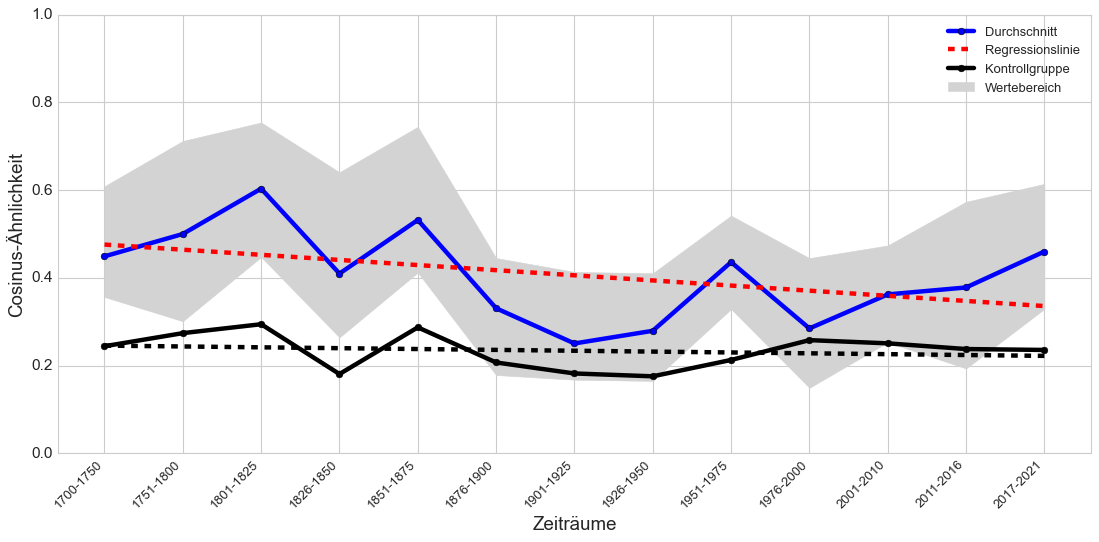

In [86]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(terribilmente_mean)))
plt.xticks(ticks=x_indexes, labels=terribilmente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, terribilmente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, terribilmente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, terribilmente_max_list, terribilmente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(terribilmente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

#Kontrollgruppe
plt.plot(x_indexes, control_mean.values(), label='Kontrollgruppe', marker='o', color='black')
coef = np.polyfit(x_indexes, list(control_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), linestyle='--', color='black')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### tremendamente

In [87]:
compare_words(periods, models, 'tremendamente')

,1700-1750,1751-1800,1801-1825,1826-1850,1851-1875,1876-1900,1901-1925,1926-1950,1951-1975,1976-2000,2001-2010,2011-2016,2017-2021
0,not in vocab,not in vocab,"(avara, 0.9540155529975891)","(decapitato, 0.8874222040176392)","(comprimere, 0.9072543978691101)","(tradito, 0.8134346008300781)","(gastigata, 0.8086167573928833)","(esecrabile, 0.6785801649093628)","(nefasto, 0.7826350927352905)","(terribilmente, 0.7989007234573364)","(terribilmente, 0.7981178760528564)","(terribilmente, 0.8180042505264282)","(terribilmente, 0.7829735279083252)"
1,not in vocab,not in vocab,"(indurisi, 0.9525783061981201)","(temperarlo, 0.8869219422340393)","(spasimante, 0.8785353899002075)","(annientare, 0.812284529209137)","(furberia, 0.7912500500679016)","(attenderla, 0.6746625900268555)","(attendistici, 0.7822770476341248)","(spaventosamente, 0.6712811589241028)","(mostruosamente, 0.6722838878631592)","(mostruosamente, 0.6258576512336731)","(mostruosamente, 0.6843199133872986)"
2,not in vocab,not in vocab,"(fulmini, 0.9524161219596863)","(asciuttamente, 0.886311948299408)","(rantolo, 0.8711937665939331)","(irrimediabilmente, 0.80372154712677)","(fedelt, 0.7763980627059937)","(majolica, 0.6660670638084412)","(futuribile, 0.7743125557899475)","(egoista, 0.667430579662323)","(spaventosamente, 0.6350873112678528)","(spaventosamente, 0.612127959728241)","(cinico, 0.6748501062393188)"
3,not in vocab,not in vocab,"(eccheggianti, 0.9522866606712341)","(flalane, 0.8862339854240417)","(contorcere, 0.8711228966712952)","(disdegno, 0.7977769374847412)","(premeditatamente, 0.7762294411659241)","(accasciare, 0.6573667526245117)","(cole, 0.7740252614021301)","(tecnicamente, 0.6205753087997437)","(orribilmente, 0.6010284423828125)","(noioso, 0.6106956005096436)","(spaventosamente, 0.6690500974655151)"
4,not in vocab,not in vocab,"(inalbava, 0.9517552852630615)","(ricredessero, 0.8834749460220337)","(pulsazione, 0.8691287040710449)","(spasmodico, 0.7973971962928772)","(avvalersi, 0.7754287719726562)","(disfida, 0.6545135974884033)","(calcolati, 0.7712187170982361)","(scialbo, 0.6175227165222168)","(ingenuo, 0.5982164144515991)","(egoista, 0.5914494395256042)","(angosciante, 0.6607823967933655)"
5,not in vocab,not in vocab,"(orditrice, 0.9497777819633484)","(famigliarit, 0.88237464427948)","(anelito, 0.8680413961410522)","(infelicità, 0.7894266247749329)","(pensata, 0.7726067304611206)","(avvicinarsi, 0.6528775095939636)","(stalinismo, 0.7704445719718933)","(catalogna, 0.6166584491729736)","(noioso, 0.5671330690383911)","(annoiare, 0.5811377167701721)","(eccessivamente, 0.6520261168479919)"
6,not in vocab,not in vocab,"(propagossi, 0.9464610815048218)","(velò, 0.8813411593437195)","(ghiacciato, 0.8649737238883972)","(delirii, 0.785533607006073)","(ripulse, 0.7713125348091125)","(buffoneria, 0.6509656310081482)","(larghissimamente, 0.7598602771759033)","(ostico, 0.612528920173645)","(irraggiungibile, 0.5666059851646423)","(enigmatico, 0.5805978775024414)","(apparentemente, 0.6489028334617615)"
7,not in vocab,not in vocab,"(ubbidir, 0.9457360506057739)","(infrenabile, 0.8809337019920349)","(stravolgere, 0.8481700420379639)","(insostenibile, 0.7841078639030457)","(doventasse, 0.7694175243377686)","(riaffrontarla, 0.6500590443611145)","(posteriori, 0.7598009705543518)","(serioso, 0.6119990944862366)","(apparentemente, 0.564920961856842)","(angosciante, 0.5773933529853821)","(sarcasmo, 0.6449565887451172)"
8,not in vocab,not in vocab,"(investir, 0.9455190896987915)","(imperituro, 0.880544900894165)","(gelido, 0.8466418385505676)","(insanabile, 0.7832620143890381)","(oltraggioso, 0.7688446640968323)","(preso, 0.6495182514190674)","(pervertimento, 0.7588396072387695)","(anacronistico, 0.6116491556167603)","(patetico, 0.5645925998687744)","(seducente, 0.5755659937858582)","(umorismo, 0.6366543769836426)"
9,not in vocab,not in vocab,"(circoli, 0.945033073425293)","(congiunte, 0.8804709911346436)","(spasmodico, 0.8465735912322998)","(impressionabile, 0.7828048467636108)","(me

In [88]:
compare_cos(periods, models, 'tremendamente', 'molto')

{'1801-1825': 0.40334200859069824,
 '1826-1850': 0.48401954770088196,
 '1851-1875': 0.4675678312778473,
 '1876-1900': 0.45431193709373474,
 '1901-1925': 0.441263347864151,
 '1926-1950': 0.2966899573802948,
 '1951-1975': 0.39029061794281006,
 '1976-2000': 0.507786750793457,
 '2001-2010': 0.4192024767398834,
 '2011-2016': 0.44497036933898926,
 '2017-2021': 0.4764063060283661}

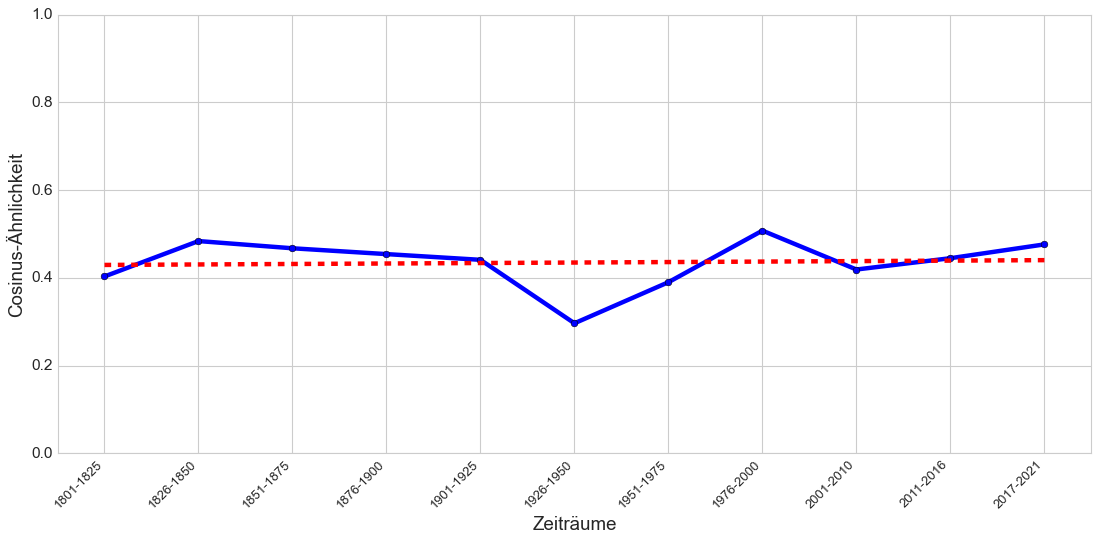

In [89]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

data = compare_cos(periods, models, 'tremendamente', 'molto')
x_indexes = np.arange(len(data))
plt.ylim(0, 1)
plt.xticks(ticks=x_indexes, labels=data.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.plot(x_indexes, data.values(), label='tremendamente-molto', marker='o', color='b')
plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

# Regressionslinie
coef = np.polyfit(x_indexes, list(data.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.tight_layout()
plt.margins(0.05, 0.05)
#plt.legend(loc='upper right')

plt.show()

In [90]:
tremendamente1 = compare_cos(periods, models, 'tremendamente', 'angoscia')
tremendamente2 = compare_cos(periods, models, 'tremendamente', 'atterrire')
tremendamente3 = compare_cos(periods, models, 'tremendamente', 'panico')
tremendamente4 = compare_cos(periods, models, 'tremendamente', 'paura')
tremendamente5 = compare_cos(periods, models, 'tremendamente', 'raccapricciare')
tremendamente6 = compare_cos(periods, models, 'tremendamente', 'schifo')
tremendamente7 = compare_cos(periods, models, 'tremendamente', 'sgomentare')
tremendamente8 = compare_cos(periods, models, 'tremendamente', 'sgomento')
tremendamente9 = compare_cos(periods, models, 'tremendamente', 'spaventare')
tremendamente10 = compare_cos(periods, models, 'tremendamente', 'spavento')
tremendamente11 = compare_cos(periods, models, 'tremendamente', 'terrore')

In [91]:
tremendamente_df = pd.DataFrame([tremendamente1, tremendamente2, tremendamente3, tremendamente4, tremendamente5, tremendamente6, tremendamente7, tremendamente8, tremendamente9, tremendamente10, tremendamente11])

# Durchschnitt pro Zeitraum
tremendamente_mean = dict(tremendamente_df.mean())

# min pro Zeitraum
tremendamente_min = dict(tremendamente_df.min())
tremendamente_min_list = [float(x) for x in list(tremendamente_min.values())]

#max pro Zeitraum 
tremendamente_max = dict(tremendamente_df.max())
tremendamente_max_list = [float(x) for x in list(tremendamente_max.values())]

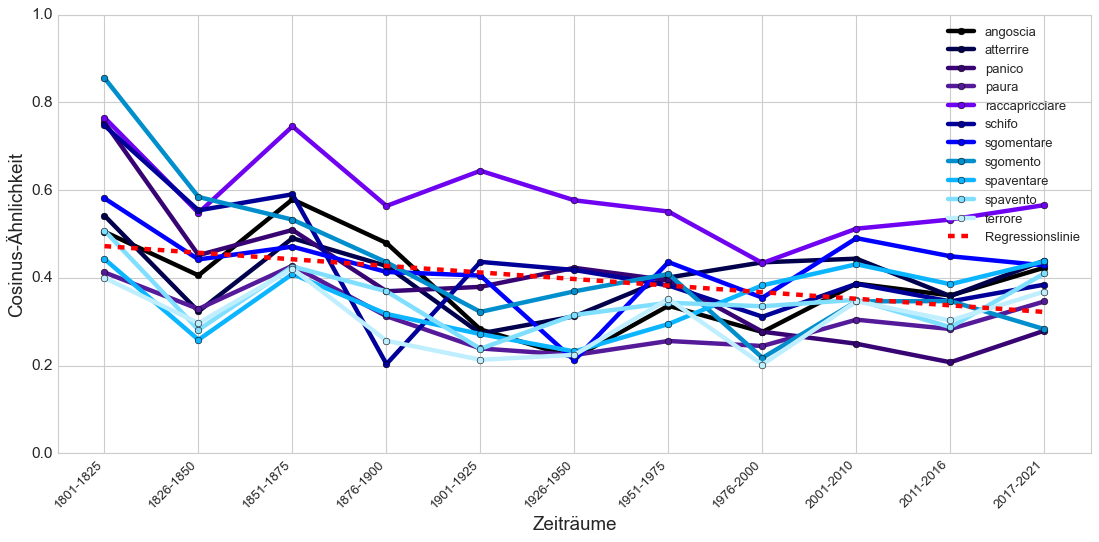

In [92]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente1.values(), label='angoscia', marker='o', color='#000000')
plt.plot(x_indexes, tremendamente2.values(), label='atterrire', marker='o', color='#00004d') 
plt.plot(x_indexes, tremendamente3.values(), label='panico', marker='o', color='#380474')
plt.plot(x_indexes, tremendamente4.values(), label='paura', marker='o', color='#551a99')
plt.plot(x_indexes, tremendamente5.values(), label='raccapricciare', marker='o', color='#6f02f0')
plt.plot(x_indexes, tremendamente6.values(), label='schifo', marker='o', color='#000099')
plt.plot(x_indexes, tremendamente7.values(), label='sgomentare', marker='o', color='#0000FF')
plt.plot(x_indexes, tremendamente8.values(), label='sgomento', marker='o', color='#008fcc')
plt.plot(x_indexes, tremendamente9.values(), label='spaventare', marker='o', color='#0BB5FF')
plt.plot(x_indexes, tremendamente10.values(), label='spavento', marker='o', color='#80dfff')
plt.plot(x_indexes, tremendamente11.values(), label='terrore', marker='o', color='#BFEFFF')
#plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='r')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()

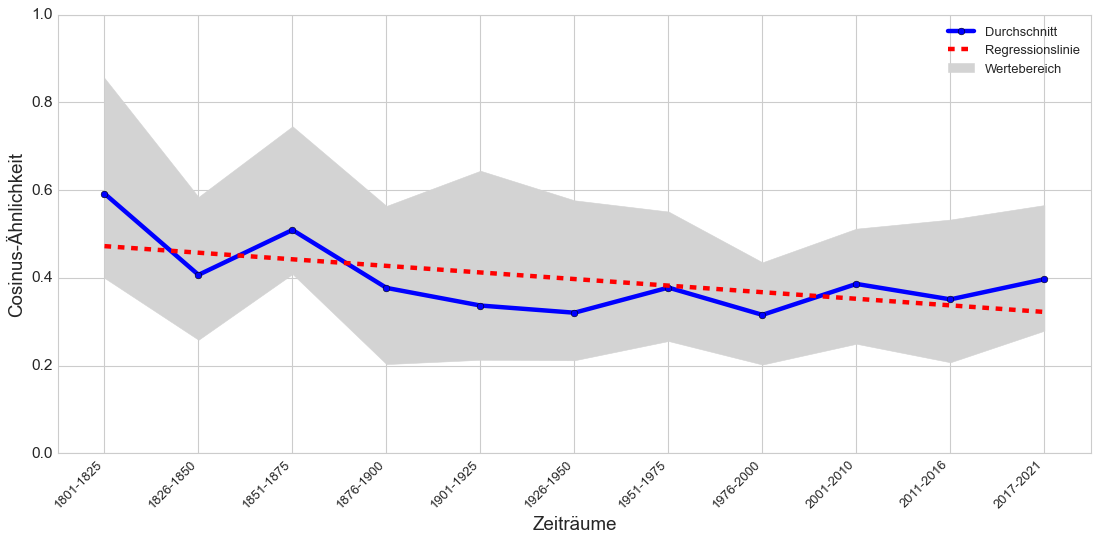

In [93]:
plt.figure(figsize=[14, 7])
plt.style.use('seaborn-whitegrid')

x_indexes = list(np.arange(len(tremendamente_mean)))
plt.xticks(ticks=x_indexes, labels=tremendamente_mean.keys(), rotation=45, horizontalalignment='right', fontsize='small')
plt.ylim(0, 1)

plt.plot(x_indexes, tremendamente_mean.values(), label='Durchschnitt', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_min_list, label='min', marker='o', color='b')
#plt.plot(x_indexes, tremendamente_max_list, label='max', marker='o', color='b')
plt.fill_between(x_indexes, tremendamente_max_list, tremendamente_min_list, label='Wertebereich', color='#D3D3D3')

# Regressionslinie
coef = np.polyfit(x_indexes, list(tremendamente_mean.values()), 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(x_indexes, poly1d_fn(x_indexes), label='Regressionslinie', linestyle='--', color='r')

plt.xlabel('Zeiträume')
plt.ylabel('Cosinus-Ähnlichkeit')

plt.tight_layout()
plt.margins(0.05, 0.05)
plt.legend(loc='upper right', fontsize='small')

plt.show()